# Quantifying Interlingua Across Models

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# %%time
# !python encode_dataset_with_models.py {'norm_1M'}

In [4]:
# %%time
# !python run_analysis.py norm_1M acc
# !python run_analysis.py norm_1M cka
# !python run_analysis.py norm_1M acc-cent
# !python run_analysis.py norm_1M acc-procrustes

In [5]:
# %%time
# !python run_analysis.py norm_1M svcca
# !python run_analysis.py norm_1M pwcca

In [6]:
import pickle
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [262]:
sns.set(font_scale=2) 
plt.style.use('seaborn-whitegrid')

In [263]:
# ACCURACY
def load_dfs(model_classes, tasks):
    dfs = {}

    #for model_class in ["norm_1M", "norm", "xlmr", "xglm", "mT5"]:
    for model_class in model_classes:
        task_dfs = []
        # for task in ["acc", "acc-procrustes", "cka"]: # ["cka", "acc", "acc-cent", "acc-procrustes"]:
        for task in tasks:
            scores_dfs = pickle.load(open(f"../experiments/encoded_datasets/xnli/{model_class}-{task}-all_models.pkl", 'rb'))
            scores_dfs = {k: pd.DataFrame(dict(v)).melt(var_name="pair", value_name="score", ignore_index=False) for k, v in scores_dfs.items()}

            for k, v in scores_dfs.items():
                scores_dfs[k]['layer'] = v.index
                if k.split('/')[-1].startswith("checkpoint"):
                    scores_dfs[k]['model'] = k.split('/')[-2]
                else:
                    scores_dfs[k]['model'] = k.split('/')[-1]

            scores_dfs = pd.concat(scores_dfs, axis=0, ignore_index=True)
            scores_dfs["analysis"] = task
            task_dfs.append(scores_dfs)
        
        task_dfs = pd.concat(task_dfs, axis=0, ignore_index=True)
        dfs[model_class] = task_dfs
    return dfs

# Motivating example 1

In [264]:
# def relplot_wrapepr(df):
#     g = sns.relplot(data=df, 
#             x="layer", 
#             y="score", 
#             hue="model", 
#             style="model", 
#             markers=True, 
#             row="analysis",
#             kind="line", 
#             ci="sd",
#             linewidth=3.5,
#             markersize=12,
#             height=4,
#             aspect=3
#             #facet_kws={"legend_out": True}
#             )

#     plt.ylim(0,1)

In [265]:
# def relplot_wrapepr(df, y_name="score"):
#     g = sns.relpot(data=df, 
#             x="layer", 
#             y="score", 
#             hue="pair", 
#             style="pair", 
#             markers=True, 
#             row="model",
#             col="analysis",
#             kind="line", 
#             ci="sd",
#             linewidth=3.5,
#             markersize=12,
#             aspect=1.5
#             #facet_kws={"legend_out": True}
#             )

#     plt.ylabel(y_name)
#     plt.ylim(0,1)

### CKA

In [ ]:

dfs = load_dfs(["norm_1M"], ["cka"])
df = dfs["norm_1M"]
y_name = "CKA"

df.rename(columns = {'score':y_name}, inplace=True)

#a4_dims = (8, 4)
#fig, ax = plt.subplots(figsize=a4_dims)

g = sns.relplot(
        # ax=ax,
        row="model",
        row_order=["scale_post", "scale_pre", "scale_normformer"], 
        data=df, 
        x="layer", 
        y=y_name, 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=15,
        aspect=2.5,
        height=3
        #facet_kws={"legend_out": True}
        )

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.42, 1), ncol=2, title=None, frameon=True,
)
# leg = plt.legend(frameon=True)
plt.xticks(range(0,13,2))
plt.ylabel(y_name)
g.set(ylim=(0, 0.8))
plt.yticks([0,0.5,0.8])

#move overall title up
# g.fig.subplots_adjust(top=.8)

#add overall title
# g.fig.suptitle('Stats by Team')
(g.set_titles("{row_name}")
  .tight_layout(w_pad=0))

g.figure.savefig(f"../assets/motivating-examples/all_{y_name}.pdf", dpi=300, bbox_inches='tight')



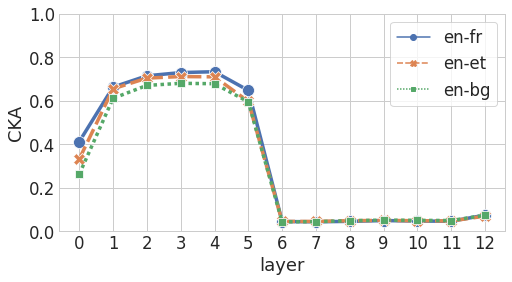

In [93]:

dfs = load_dfs(["norm_1M"], ["cka"])
df = dfs["norm_1M"][dfs["norm_1M"].model == "scale_normformer"]
y_name = "CKA"

a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.lineplot(
        ax=ax,
        data=df, 
        x="layer", 
        y="score", 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        #kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        #aspect=1.5
        #facet_kws={"legend_out": True}
        )

leg = plt.legend(frameon=True)
plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

g.figure.savefig(f"../assets/motivating-examples/normformer_{y_name}.pdf", dpi=300, bbox_inches='tight')



#### v2

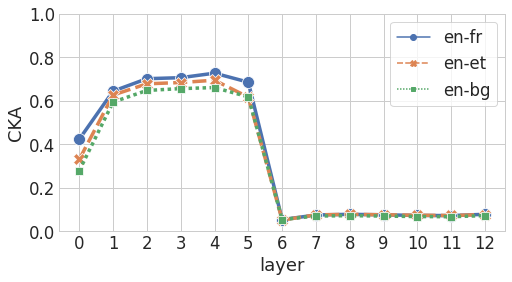

In [94]:

dfs = load_dfs(["norm_1M_v2"], ["cka"])
df = dfs["norm_1M_v2"][dfs["norm_1M_v2"].model == "scale_normformer-v2"]
y_name = "CKA"

a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.lineplot(
        ax=ax,
        data=df, 
        x="layer", 
        y="score", 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        #kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        #aspect=1.5
        #facet_kws={"legend_out": True}
        )

leg = plt.legend(frameon=True)
plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

g.figure.savefig(f"../assets/motivating-examples/normformerv2_cka.pdf", dpi=300, bbox_inches='tight')



### PWCCA

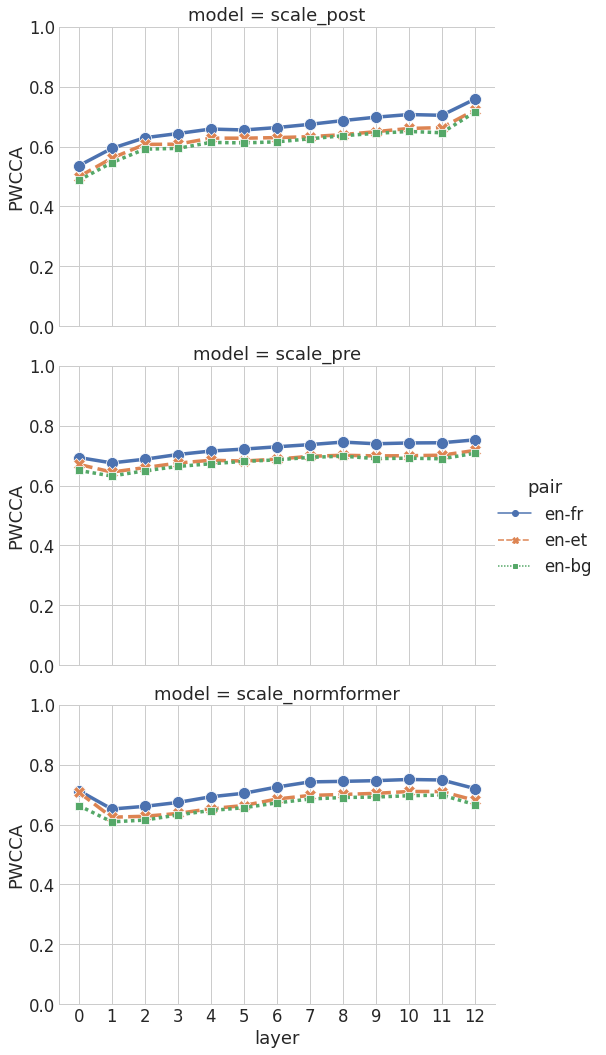

In [95]:

dfs = load_dfs(["norm_1M"], ["pwcca"])
df = dfs["norm_1M"]
y_name = "PWCCA"

df.rename(columns = {'score':y_name}, inplace=True)

#a4_dims = (8, 4)
#fig, ax = plt.subplots(figsize=a4_dims)

g = sns.relplot(
        # ax=ax,
        row="model",
        row_order=["scale_post", "scale_pre", "scale_normformer"], 
        data=df, 
        x="layer", 
        y=y_name, 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        aspect=1.5
        #facet_kws={"legend_out": True}
        )

# leg = plt.legend(frameon=True)
plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

#move overall title up
# g.fig.subplots_adjust(top=.8)

#add overall title
# g.fig.suptitle('Stats by Team')

g.figure.savefig(f"../assets/motivating-examples/all_{y_name}.pdf", dpi=300, bbox_inches='tight')

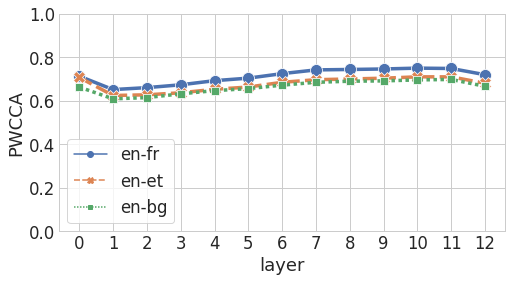

In [96]:

dfs = load_dfs(["norm_1M"], ["pwcca"])
df = dfs["norm_1M"][dfs["norm_1M"].model == "scale_normformer"]
y_name = "PWCCA"

a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.lineplot(
        ax=ax,
        data=df, 
        x="layer", 
        y="score", 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        #kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        #aspect=1.5
        #facet_kws={"legend_out": True}
        )

leg = plt.legend(frameon=True)
plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

g.figure.savefig(f"../assets/motivating-examples/normformer_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')

### SVCCA

In [216]:

# dfs = load_dfs(["norm_1M"], ["svcca"])
# df = dfs["norm_1M"]
# y_name = "SVCCA"

# df.rename(columns = {'score':y_name}, inplace=True)

# #a4_dims = (8, 4)
# #fig, ax = plt.subplots(figsize=a4_dims)

# g = sns.relplot(
#         # ax=ax,
#         row="model",
#         row_order=["scale_post", "scale_pre", "scale_normformer"], 
#         data=df, 
#         x="layer", 
#         y=y_name, 
#         hue="pair", 
#         style="pair", 
#         markers=True, 
#         #row="model",
#         #col="analysis",
#         kind="line", 
#         ci="sd",
#         linewidth=3.5,
#         markersize=12,
#         aspect=1.5
#         #facet_kws={"legend_out": True}
#         )

# # leg = plt.legend(frameon=True)
# plt.xticks(range(13))
# plt.ylabel(y_name)
# plt.ylim(0,1)

# #move overall title up
# # g.fig.subplots_adjust(top=.8)

# #add overall title
# # g.fig.suptitle('Stats by Team')

# g.figure.savefig(f"../assets/motivating-examples/all_{y_name}.pdf", dpi=300, bbox_inches='tight')



In [217]:

# dfs = load_dfs(["norm_1M"], ["svcca"])
# df = dfs["norm_1M"][dfs["norm_1M"].model == "scale_normformer"]
# y_name = "SVCCA"

# a4_dims = (8, 4)
# fig, ax = plt.subplots(figsize=a4_dims)

# g = sns.lineplot(
#         ax=ax,
#         data=df, 
#         x="layer", 
#         y="score", 
#         hue="pair", 
#         style="pair", 
#         markers=True, 
#         #row="model",
#         #col="analysis",
#         #kind="line", 
#         ci="sd",
#         linewidth=3.5,
#         markersize=12,
#         #aspect=1.5
#         #facet_kws={"legend_out": True}
#         )

# leg = plt.legend(frameon=True)
# plt.xticks(range(13))
# plt.ylabel(y_name)
# plt.ylim(0,1)

# g.figure.savefig(f"../assets/motivating-examples/normformer_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')

### Matching accuracy

In [ ]:

dfs = load_dfs(["norm_1M"], ["acc"])
df = dfs["norm_1M"]
y_name = "accuracy"

df.rename(columns = {'score':y_name}, inplace=True)

#a4_dims = (8, 4)
#fig, ax = plt.subplots(figsize=a4_dims)

g = sns.relplot(
        # ax=ax,
        row="model",
        row_order=["scale_post", "scale_pre", "scale_normformer"], 
        data=df, 
        x="layer", 
        y=y_name, 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        aspect=2.5,
        height=3
        #facet_kws={"legend_out": True}
        )

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.42, 1), ncol=2, title=None, frameon=True,
)
# leg = plt.legend(frameon=True)
plt.xticks(range(0,13,2))
plt.ylabel(y_name)
plt.ylim(0,1)

#move overall title up
# g.fig.subplots_adjust(top=.8)

#add overall title
# g.fig.suptitle('Stats by Team')

#g.figure.savefig(f"../assets/motivating-examples/normformer_cka.pdf", dpi=300, bbox_inches='tight')

(g.set_titles("{row_name}")
  .tight_layout(w_pad=0))

g.figure.savefig(f"../assets/motivating-examples/all_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')



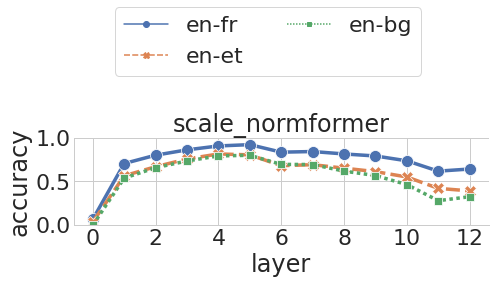

In [246]:

dfs = load_dfs(["norm_1M"], ["acc"])
df = dfs["norm_1M"]
y_name = "accuracy"

df.rename(columns = {'score':y_name}, inplace=True)

#a4_dims = (8, 4)
#fig, ax = plt.subplots(figsize=a4_dims)

g = sns.relplot(
        # ax=ax,
        row="model",
        #row_order=["scale_post", "scale_pre", "scale_normformer"], 
        data=df[df.model=="scale_normformer"], 
        x="layer", 
        y=y_name, 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        aspect=2.5,
        height=3
        #facet_kws={"legend_out": True}
        )

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.42, 1), ncol=2, title=None, frameon=True,
)
# leg = plt.legend(frameon=True)
plt.xticks(range(0,13,2))
plt.yticks([0, 0.5, 1])
plt.ylabel(y_name)
plt.ylim(0,1)

#move overall title up
# g.fig.subplots_adjust(top=.8)

#add overall title
# g.fig.suptitle('Stats by Team')

#g.figure.savefig(f"../assets/motivating-examples/normformer_cka.pdf", dpi=300, bbox_inches='tight')

(g.set_titles("{row_name}")
  .tight_layout(w_pad=0))

g.figure.savefig(f"../assets/motivating-examples/all_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')



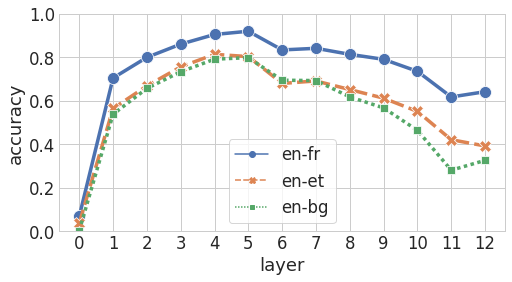

In [99]:

dfs = load_dfs(["norm_1M"], ["acc"])
df = dfs["norm_1M"][dfs["norm_1M"].model == "scale_normformer"]
y_name = "accuracy"

a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.lineplot(
        ax=ax,
        data=df, 
        x="layer", 
        y="score", 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        #kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        #aspect=1.5
        #facet_kws={"legend_out": True}
        )

leg = plt.legend(frameon=True)
plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

g.figure.savefig(f"../assets/motivating-examples/normformer_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')

## NAIVE CORR

### Sanitty checks (mbert + roberta)

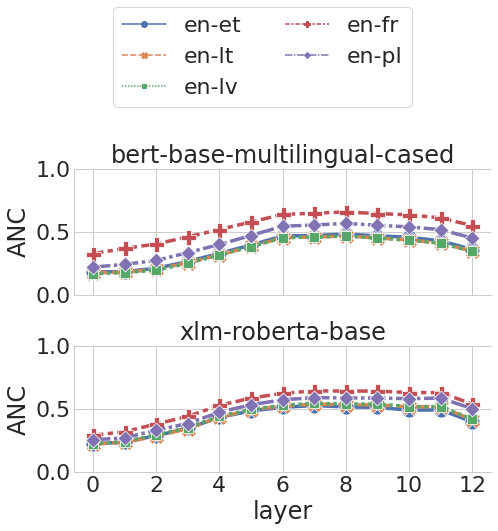

In [231]:

dfs = load_dfs(["xlmrb"], ["corr"])
df = dfs["xlmrb"]

dfs = load_dfs(["mbert"], ["corr"])
df2 = dfs["mbert"]

df = pd.concat([df,df2])

y_name = "ANC"

df.rename(columns = {'score':y_name}, inplace=True)

#a4_dims = (8, 4)
#fig, ax = plt.subplots(figsize=a4_dims)

g = sns.relplot(
        # ax=ax,
        row="model",
        row_order=["bert-base-multilingual-cased", "xlm-roberta-base"], 
        data=df, 
        x="layer", 
        y=y_name, 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=15,
        aspect=2.5,
        height=3
        #facet_kws={"legend_out": True}
        )

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.45, 1), ncol=2, title=None, frameon=True,
)
# leg = plt.legend(frameon=True)
plt.xticks(range(0,13,2))
plt.ylabel(y_name)
plt.ylim(0,1)

(g.set_titles("{row_name}"))

#move overall title up
# g.fig.subplots_adjust(top=.8)

#add overall title
# g.fig.suptitle('Stats by Team')

g.figure.savefig(f"../assets/motivating-examples/sanity_{y_name}.pdf", dpi=300, bbox_inches='tight')



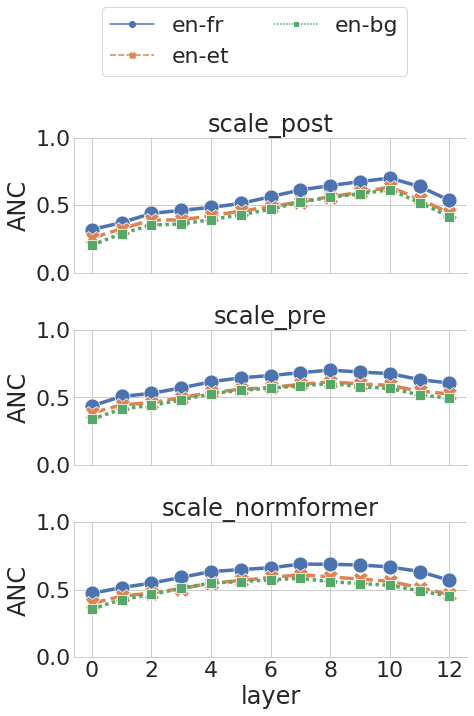

In [230]:

dfs = load_dfs(["norm_1M"], ["corr"])
df = dfs["norm_1M"]
y_name = "ANC"

df.rename(columns = {'score':y_name}, inplace=True)

#a4_dims = (8, 4)
#fig, ax = plt.subplots(figsize=a4_dims)

g = sns.relplot(
        # ax=ax,
        row="model",
        row_order=["scale_post", "scale_pre", "scale_normformer"], 
        data=df, 
        x="layer", 
        y=y_name, 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=15,
        aspect=2.5,
        height=3
        #facet_kws={"legend_out": True}
        )

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.4, 1), ncol=2, title=None, frameon=True,
)

(g.set_titles("{row_name}")
  .tight_layout(w_pad=0))

# leg = plt.legend(frameon=True)
plt.xticks(range(0,13,2))
plt.ylabel(y_name)
plt.ylim(0,1)

#move overall title up
# g.fig.subplots_adjust(top=.8)

#add overall title
# g.fig.suptitle('Stats by Team')

g.figure.savefig(f"../assets/motivating-examples/all_{y_name}.pdf", dpi=300, bbox_inches='tight')



# Scaling Laws

In [257]:
sns.set(font_scale=2.5) 
plt.style.use('seaborn-whitegrid')

In [258]:
aspect=1.5
height=4

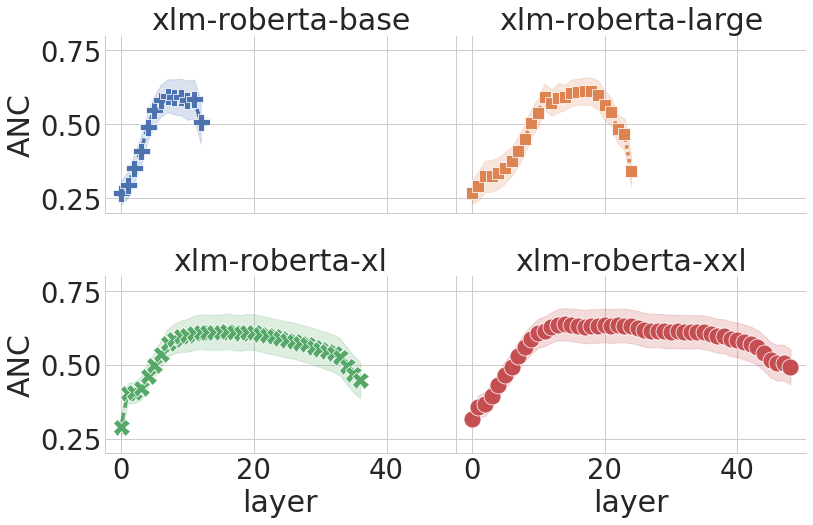

In [259]:

mdl="xlmr"
dfs = load_dfs([mdl], ["corr"])
df = dfs[mdl]
y_name = "ANC"
order = ["xlm-roberta-base", "xlm-roberta-large", "xlm-roberta-xl", "xlm-roberta-xxl"]

df.rename(columns = {'score':y_name}, inplace=True)

#a4_dims = (8, 4)
#fig, ax = plt.subplots(figsize=a4_dims)

g = sns.relplot(
        col="model",
        col_wrap=2,
        data=df, 
        x="layer", 
        y=y_name, 
        hue="model",
        hue_order=order, 
        col_order=order, 
        style="model", 
        markers=True, 
        #row="model",
        #col="analysis",
        kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=17,
        aspect=aspect,
        height=height,
        legend=False,
        #facet_kws={"legend_out": True},
        #facet_kws={"legend_out": True}
        )

plt.ylabel(y_name)
plt.ylim(0.2,0.8)

# sns.move_legend(
#     g, "lower center",
#     bbox_to_anchor=(.45, 1), ncol=2, title=None, frameon=True,
# )

(g.set_titles("{col_name}")
  .tight_layout(w_pad=0))


g.figure.savefig(f"../assets/motivating-examples/laws_{mdl}_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')




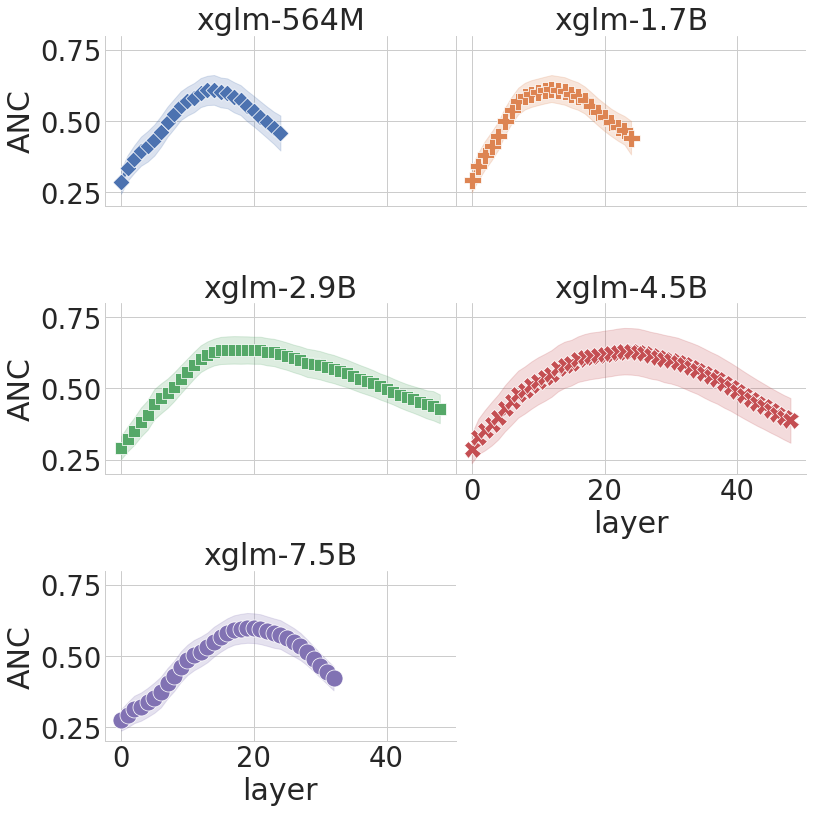

In [260]:

mdl="xglm"
dfs = load_dfs([mdl], ["corr"])
df = dfs[mdl]
y_name = "ANC"

order = list(reversed(["xglm-7.5B", "xglm-4.5B", "xglm-2.9B", "xglm-1.7B", "xglm-564M"]))

df.rename(columns = {'score':y_name}, inplace=True)

#a4_dims = (8, 4)
#fig, ax = plt.subplots(figsize=a4_dims)
g = sns.relplot(
        col="model",
        col_wrap=2,
        data=df, 
        x="layer", 
        y=y_name, 
        hue="model",
        hue_order=order, 
        col_order=order, 
        style="model", 
        markers=True, 
        #row="model",
        #col="analysis",
        kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=17,
        aspect=aspect,
        height=height,
        legend=False,
        #facet_kws={"legend_out": True},
        #facet_kws={"legend_out": True}
        )

plt.ylabel(y_name)
plt.ylim(0.2,0.8)

# sns.move_legend(
#     g, "lower center",
#     bbox_to_anchor=(.45, 1), ncol=2, title=None, frameon=True,
# )

(g.set_titles("{col_name}")
  .tight_layout(w_pad=0))


g.figure.savefig(f"../assets/motivating-examples/laws_{mdl}_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')




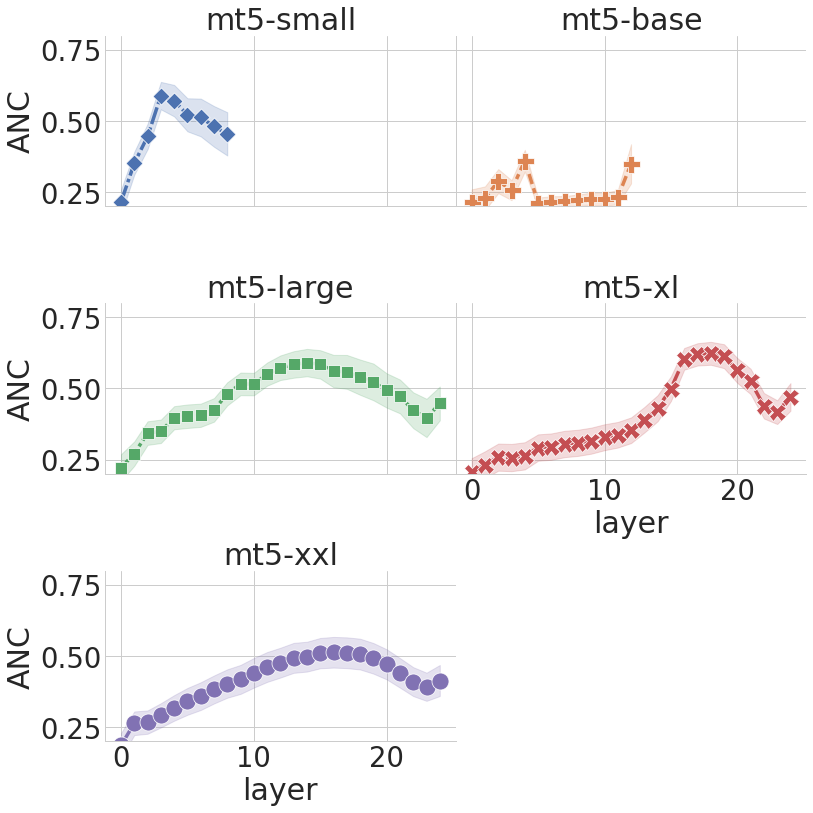

In [261]:

mdl="mT5"
dfs = load_dfs([mdl], ["corr"])
df = dfs[mdl]
y_name = "ANC"
order=["mt5-small", "mt5-base", "mt5-large", "mt5-xl", "mt5-xxl"]
df.rename(columns = {'score':y_name}, inplace=True)

#a4_dims = (8, 4)
#fig, ax = plt.subplots(figsize=a4_dims)
g = sns.relplot(
        col="model",
        col_wrap=2,
        data=df, 
        x="layer", 
        y=y_name, 
        hue="model",
        hue_order=order, 
        col_order=order, 
        style="model", 
        markers=True, 
        #row="model",
        #col="analysis",
        kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=17,
        aspect=aspect,
        height=height,
        legend=False,
        #facet_kws={"legend_out": True},
        #facet_kws={"legend_out": True}
        )

plt.ylabel(y_name)
plt.ylim(0.2,0.8)
# sns.move_legend(
#     g, "lower center",
#     bbox_to_anchor=(.45, 1), ncol=2, title=None, frameon=True,
# )

(g.set_titles("{col_name}")
  .tight_layout(w_pad=0))


g.figure.savefig(f"../assets/motivating-examples/laws_{mdl}_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')




In [130]:

# dfs = load_dfs(["mT5"], ["corr"])
# df = dfs["mT5"]
# y_name = "ANC"

# df.rename(columns = {'score':y_name}, inplace=True)

# #a4_dims = (8, 4)
# #fig, ax = plt.subplots(figsize=a4_dims)

# g = sns.relplot(
#         # ax=ax,
#         #col="model",
#         #col_order=["xlm-roberta-base", "xlm-roberta-large", "xlm-roberta-xl", "xlm-roberta-xxl"], 
#         hue_order=reversed(["mt5-small", "mt5-base", "mt5-large", "mt5-xl", "mt5-xxl"]),
#         data=df, 
#         x="layer", 
#         y=y_name, 
#         hue="model", 
#         style="model", 
#         markers=True, 
#         #row="model",
#         #col="analysis",
#         kind="line", 
#         ci=None,
#         linewidth=3.5,
#         markersize=10,
#         aspect=1.5,
#         facet_kws={"legend_out": True},
#         #facet_kws={"legend_out": True}
#         )

# # leg = plt.legend(frameon=True)
# # plt.xticks(range(13))
# plt.ylabel(y_name)
# plt.ylim(0,1)

# # header_name=['a','b','c','d']
# # x_tick_interval = 15
# # value_tick = range ( 0, 50, x_tick_interval )
# # num_layers = [13, 25, 37, 49]


# # for i, ax in enumerate(g.axes.flat):
# #     labels = ax.get_xticklabels() # get x labels
# #     ax.set_xticks(ticks=list(range(0, num_layers[i], 4))) # set new labels
# #     # ax.set_xticklabels(fontsize=15, rotation=45, labels=list(range(num_layers[i])))

# #move overall title up
# # g.fig.subplots_adjust(top=.8)

# #add overall title
# # g.fig.suptitle('Stats by Team')

# #g.figure.savefig(f"../assets/motivating-examples/normformer_cka.pdf", dpi=300, bbox_inches='tight')

# sns.move_legend(
#     g, "lower center",
#     bbox_to_anchor=(.45, 1), ncol=2, title='model', frameon=True,
# )
# g.figure.savefig(f"../assets/motivating-examples/laws_mt5_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')
# # plt.savefig(f"../assets/motivating-examples/laws_mt5_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')


# The End

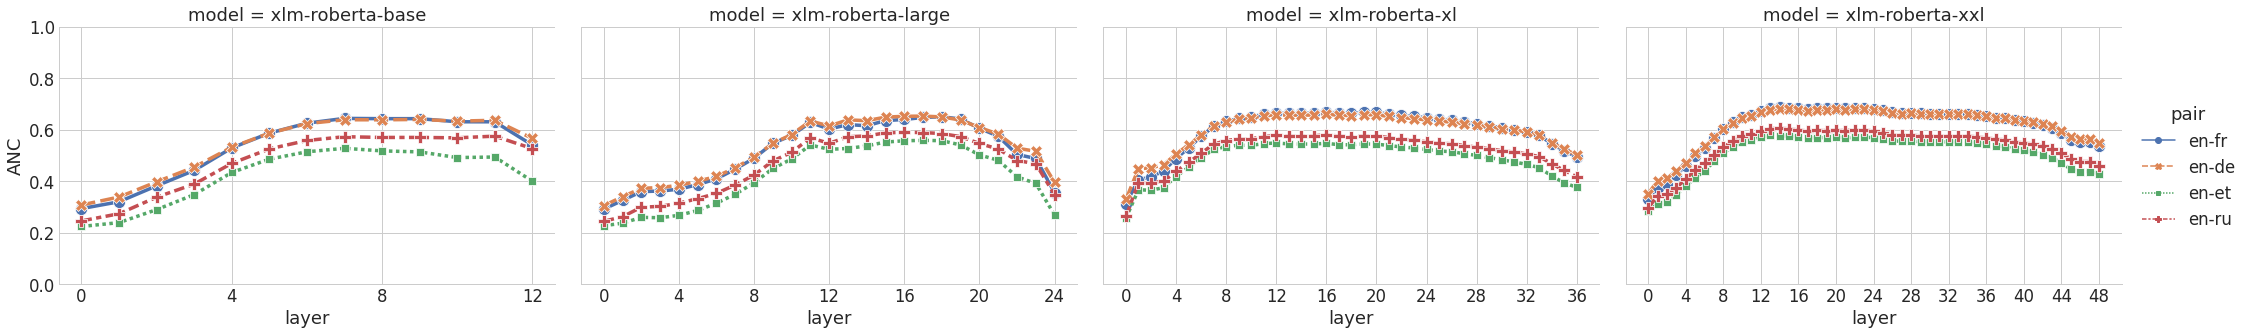

In [22]:

dfs = load_dfs(["xlmr"], ["corr"])
df = dfs["xlmr"]
y_name = "ANC"

df.rename(columns = {'score':y_name}, inplace=True)

#a4_dims = (8, 4)
#fig, ax = plt.subplots(figsize=a4_dims)

g = sns.relplot(
        # ax=ax,
        col="model",
        # col_order=["xlm-roberta-base", "xlm-roberta-large", "xlm-roberta-xl", "xlm-roberta-xxl"], 
        data=df, 
        x="layer", 
        y=y_name, 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        aspect=1.5,
        facet_kws={'sharey': True, 'sharex': False},
        #facet_kws={"legend_out": True}
        )

# leg = plt.legend(frameon=True)
# plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

header_name=['a','b','c','d']
x_tick_interval = 15
value_tick = range ( 0, 50, x_tick_interval )
num_layers = [13, 25, 37, 49]


for i, ax in enumerate(g.axes.flat):
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticks(ticks=list(range(0, num_layers[i], 4))) # set new labels
    # ax.set_xticklabels(fontsize=15, rotation=45, labels=list(range(num_layers[i])))

#move overall title up
# g.fig.subplots_adjust(top=.8)

#add overall title
# g.fig.suptitle('Stats by Team')

#g.figure.savefig(f"../assets/motivating-examples/normformer_cka.pdf", dpi=300, bbox_inches='tight')


# g.figure.savefig(f"../assets/motivating-examples/all_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')



(0.0, 1.0)

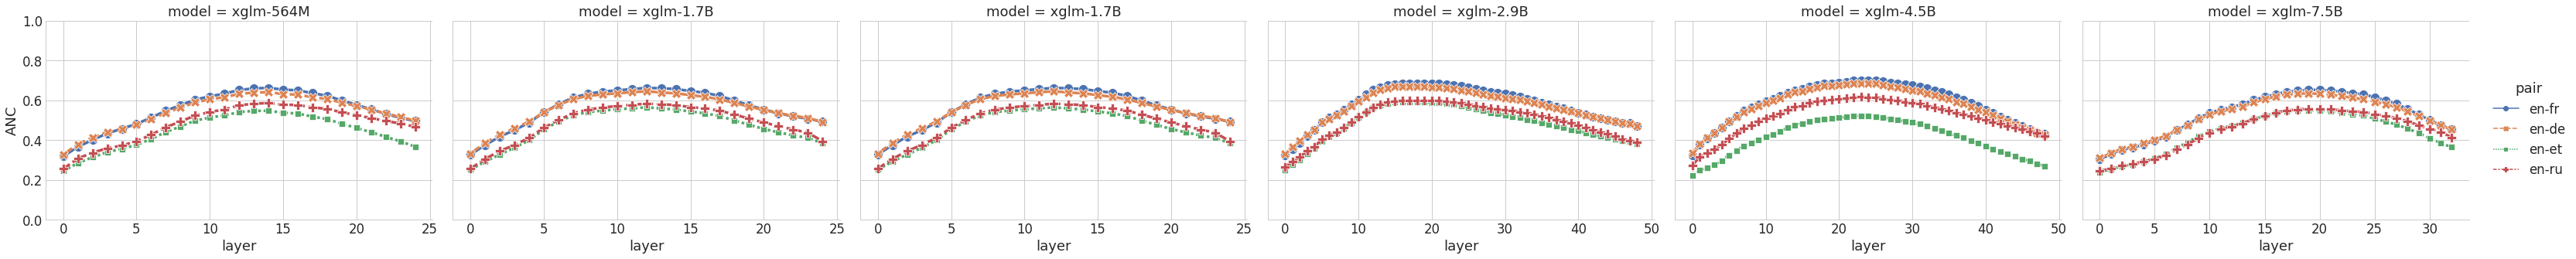

In [24]:

dfs = load_dfs(["xglm"], ["corr"])
df = dfs["xglm"]
y_name = "ANC"

df.rename(columns = {'score':y_name}, inplace=True)

#a4_dims = (8, 4)
#fig, ax = plt.subplots(figsize=a4_dims)

g = sns.relplot(
        # ax=ax,
        col="model",
        col_order=["xglm-564M", "xglm-1.7B", "xglm-1.7B", "xglm-2.9B", "xglm-4.5B", "xglm-7.5B"], 
        data=df, 
        x="layer", 
        y=y_name, 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        aspect=1.5,
        facet_kws={'sharey': True, 'sharex': False},
        #facet_kws={"legend_out": True}
        )

# leg = plt.legend(frameon=True)
# plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

num_layers = [13, 25, 37, 49]


for i, ax in enumerate(g.axes.flat):
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticks(ticks=list(range(0, num_layers[i], 4))) # set new labels
    # ax.set_xticklabels(fontsize=15, rotation=45, labels=list(range(num_layers[i])))

#move overall title up
# g.fig.subplots_adjust(top=.8)

#add overall title
# g.fig.suptitle('Stats by Team')

#g.figure.savefig(f"../assets/motivating-examples/normformer_cka.pdf", dpi=300, bbox_inches='tight')


# g.figure.savefig(f"../assets/motivating-examples/all_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')



# Motivating example 2

In [16]:
hf_model_id = 'bert-base-multilingual-cased'

In [17]:
task_df = pd.read_csv(f"../assets/baltic-cca_likes-cls.csv")

In [18]:
task_df.lang = [f"en-{l}" for l in task_df.lang]

In [19]:
task_df = task_df.rename(columns={'lang':'pair'})

### PWCCA

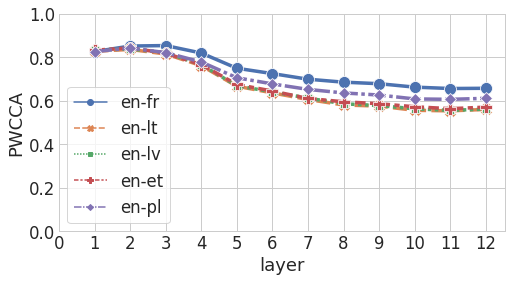

In [20]:

df = task_df[task_df.algo == "pwcca"]
y_name = "PWCCA"

a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.lineplot(
        ax=ax,
        data=df, 
        x="layer", 
        y="score", 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        #kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        #aspect=1.5
        #facet_kws={"legend_out": True}
        )

leg = plt.legend(frameon=True)
plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

g.figure.savefig(f"../assets/motivating-examples/mbert_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')

### CKA

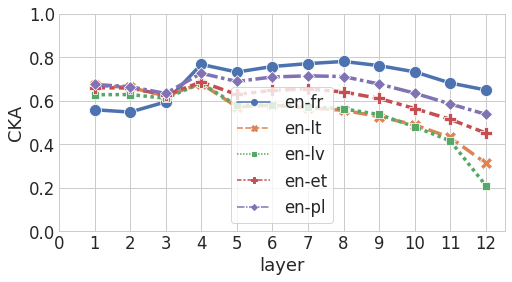

In [21]:

df = task_df[task_df.algo == "cka"]
y_name = "CKA"

a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.lineplot(
        ax=ax,
        data=df, 
        x="layer", 
        y="score", 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        #kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        #aspect=1.5
        #facet_kws={"legend_out": True}
        )

leg = plt.legend(frameon=True)
plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

g.figure.savefig(f"../assets/motivating-examples/mbert_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')

### SVCCA

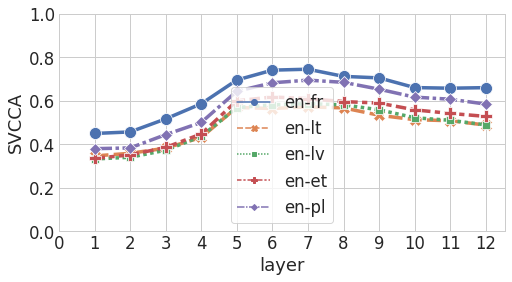

In [22]:

df = task_df[task_df.algo == "svcca"]
y_name = "SVCCA"

a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.lineplot(
        ax=ax,
        data=df, 
        x="layer", 
        y="score", 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        #kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        #aspect=1.5
        #facet_kws={"legend_out": True}
        )

leg = plt.legend(frameon=True)
plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

g.figure.savefig(f"../assets/motivating-examples/mbert_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')

### Mathcing Accuracy

In [23]:
task_df = pd.read_csv(f"../assets/baltic-acc_simscore_bert-base-multilingual-cased.csv")

In [24]:
task_df.lang = [f"en-{l}" for l in task_df.lang]
task_df = task_df.rename(columns={'lang':'pair'})

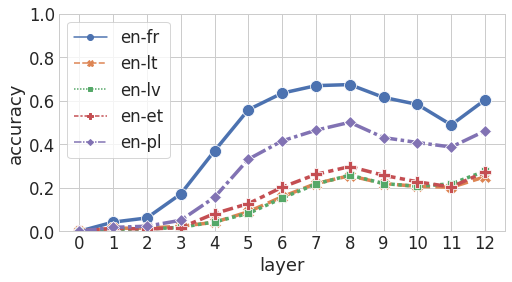

In [25]:

df = task_df[task_df.pooling == "cls"]
y_name = "accuracy"

a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.lineplot(
        ax=ax,
        data=df, 
        x="layer", 
        y="accuracy", 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        #kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        #aspect=1.5
        #facet_kws={"legend_out": True}
        )

leg = plt.legend(frameon=True)
plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

g.figure.savefig(f"../assets/motivating-examples/mbert_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')

# Cosine

### Normformer

In [26]:
dfs = load_dfs(["norm_1M"], ["cosine"])
df = dfs["norm_1M"][dfs["norm_1M"].model == "scale_normformer"]

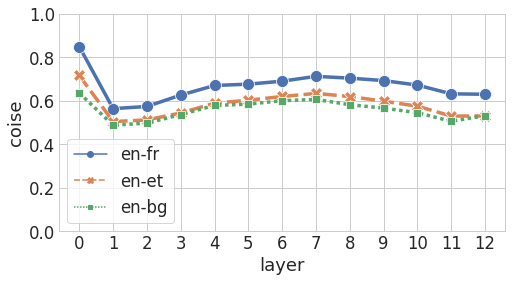

In [32]:

df = df[df.analysis == "cosine"]
y_name = "coise"

a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.lineplot(
        ax=ax,
        data=df, 
        x="layer", 
        y="score", 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        #kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        #aspect=1.5
        #facet_kws={"legend_out": True}
        )

leg = plt.legend(frameon=True)
plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

g.figure.savefig(f"../assets/motivating-examples/normformer_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')

### mBERT

In [37]:
dfs = load_dfs(["mbert"], ["cosine"])
df = dfs["mbert"][dfs["mbert"].model == "bert-base-multilingual-cased"]

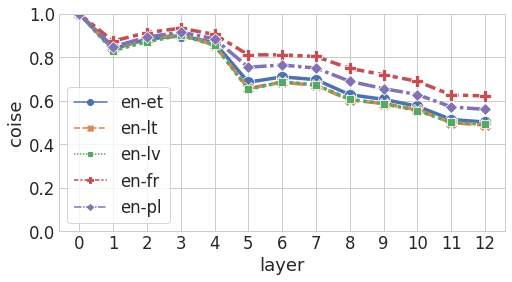

In [38]:

df = df[df.analysis == "cosine"]
y_name = "coise"

a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)

g = sns.lineplot(
        ax=ax,
        data=df, 
        x="layer", 
        y="score", 
        hue="pair", 
        style="pair", 
        markers=True, 
        #row="model",
        #col="analysis",
        #kind="line", 
        ci="sd",
        linewidth=3.5,
        markersize=12,
        #aspect=1.5
        #facet_kws={"legend_out": True}
        )

leg = plt.legend(frameon=True)
plt.xticks(range(13))
plt.ylabel(y_name)
plt.ylim(0,1)

g.figure.savefig(f"../assets/motivating-examples/mbert_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')

# Euclidan Neurons Discrepancy

In [97]:
dfs = load_dfs(["norm_1M"], ["euclid"])
df = dfs["norm_1M"][dfs["norm_1M"].model == "scale_normformer"]
total_d = df[df.pair == "en-en_rand"]
for p in set(df.pair):
    df.loc[df.pair == p, "score"] = df[df.pair == p].score / total_d.score

In [104]:
df

pair  score  layer             model analysis
0   en-en_rand    1.0      0  scale_normformer   euclid
1   en-en_rand    1.0      1  scale_normformer   euclid
2   en-en_rand    1.0      2  scale_normformer   euclid
3   en-en_rand    1.0      3  scale_normformer   euclid
4   en-en_rand    1.0      4  scale_normformer   euclid
5   en-en_rand    1.0      5  scale_normformer   euclid
6   en-en_rand    1.0      6  scale_normformer   euclid
7   en-en_rand    1.0      7  scale_normformer   euclid
8   en-en_rand    1.0      8  scale_normformer   euclid
9   en-en_rand    1.0      9  scale_normformer   euclid
10  en-en_rand    1.0     10  scale_normformer   euclid
11  en-en_rand    1.0     11  scale_normformer   euclid
12  en-en_rand    1.0     12  scale_normformer   euclid
13       en-fr    NaN      0  scale_normformer   euclid
14       en-fr    NaN      1  scale_normformer   euclid
15       en-fr    NaN      2  scale_normformer   euclid
16       en-fr    NaN      3  scale_normformer   euclid
17       en-fr    NaN      4  scale_normformer   euclid
18       en-fr    NaN      5  scale_normformer   euclid
19       en-fr    NaN      6  scale_normformer   euclid
20       en-fr    NaN      7  scale_normformer   euclid
21       en-fr    NaN      8  scale_normformer   euclid
22       en-fr    NaN      9  scale_normformer   euclid
23       en-fr    NaN     10  scale_normformer   euclid
24       en-fr    NaN     11  scale_normformer   euclid
25       en-fr    NaN     12  scale_normformer   euclid
26       en-et    NaN      0  scale_normformer   euclid
27       en-et    NaN      1  scale_normformer   euclid
28       en-et    NaN      2  scale_normformer   euclid
29       en-et    NaN      3  scale_normformer   euclid
30       en-et    NaN      4  scale_normformer   euclid
31       en-et    NaN      5  scale_normformer   euclid
32       en-et    NaN      6  scale_normformer   euclid
33       en-et    NaN      7  scale_normformer   euclid
34       en-et    NaN      8  scale_normformer   euclid
35       en-et    NaN      9  scale_normformer   euclid
36       en-et    NaN     10  scale_normformer   euclid
37       en-et    NaN     11  scale_normformer   euclid
38       en-et    NaN     12  scale_normformer   euclid
39       en-bg    NaN      0  scale_normformer   euclid
40       en-bg    NaN      1  scale_normformer   euclid
41       en-bg    NaN      2  scale_normformer   euclid
42       en-bg    NaN      3  scale_normformer   euclid
43       en-bg    NaN      4  scale_normformer   euclid
44       en-bg    NaN      5  scale_normformer   euclid
45       en-bg    NaN      6  scale_normformer   euclid
46       en-bg    NaN      7  scale_normformer   euclid
47       en-bg    NaN      8  scale_normformer   euclid
48       en-bg    NaN      9  scale_normformer   euclid
49       en-bg    NaN     10  scale_normformer   euclid
50       en-bg    NaN     11  scale_normformer   euclid
51       en-bg    NaN     12  scale_normformer   euclid

In [99]:
total_d

pair          score  layer             model analysis
0   en-en_rand    7578.441686      0  scale_normformer   euclid
1   en-en_rand   87369.544868      1  scale_normformer   euclid
2   en-en_rand  110331.094833      2  scale_normformer   euclid
3   en-en_rand  128999.790478      3  scale_normformer   euclid
4   en-en_rand  138466.960923      4  scale_normformer   euclid
5   en-en_rand  151009.266151      5  scale_normformer   euclid
6   en-en_rand  164592.084127      6  scale_normformer   euclid
7   en-en_rand  163264.277119      7  scale_normformer   euclid
8   en-en_rand  139388.512123      8  scale_normformer   euclid
9   en-en_rand  103462.006357      9  scale_normformer   euclid
10  en-en_rand   66637.105772     10  scale_normformer   euclid
11  en-en_rand   35313.006074     11  scale_normformer   euclid
12  en-en_rand   12602.338056     12  scale_normformer   euclid

In [ ]:

y_name = "euclid"

# a4_dims = (8, 4)
# fig, ax = plt.subplots(figsize=a4_dims)

# g = sns.lineplot(
#         ax=ax,
#         data=df, 
#         x="layer", 
#         y="score", 
#         hue="pair", 
#         style="pair", 
#         markers=True, 
#         #row="model",
#         #col="analysis",
#         #kind="line", 
#         ci="sd",
#         linewidth=3.5,
#         markersize=12,
#         #aspect=1.5
#         #facet_kws={"legend_out": True}
#         )

# leg = plt.legend(frameon=True)
# plt.xticks(range(13))
# plt.ylabel(y_name)
# plt.ylim(0,1)

# g.figure.savefig(f"../assets/motivating-examples/normformer_{y_name.lower()}.pdf", dpi=300, bbox_inches='tight')

In [96]:
set(dfs.pair['scal'])

AttributeError: 'dict' object has no attribute 'pair'

# Scaling Laws

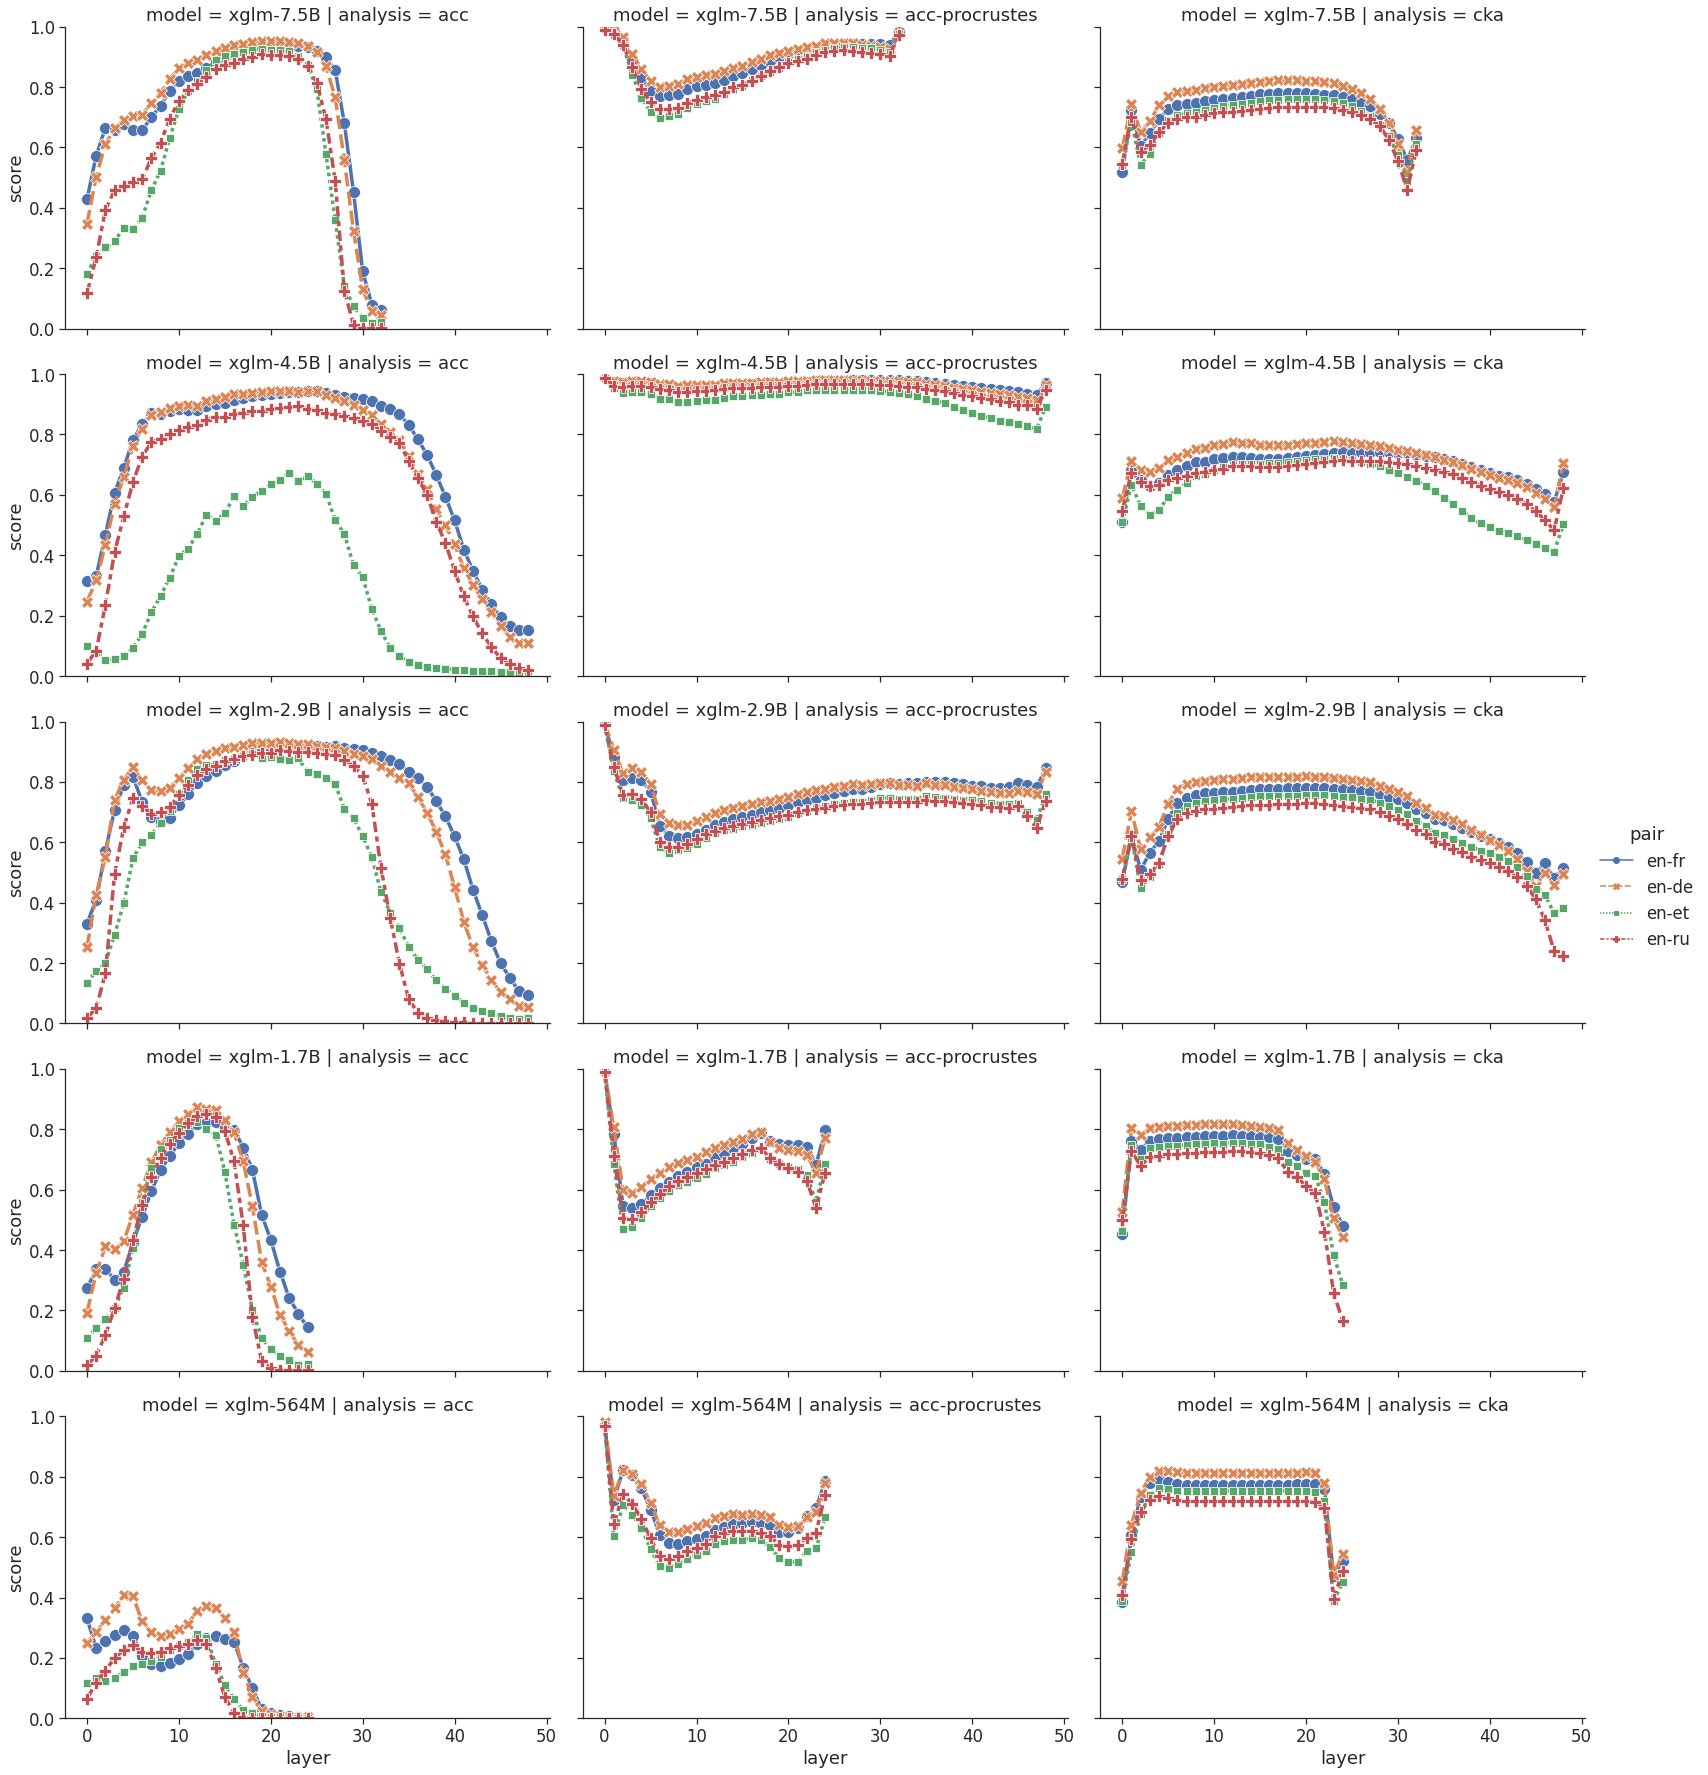

In [201]:
relplot_wrapepr(dfs["xglm"])

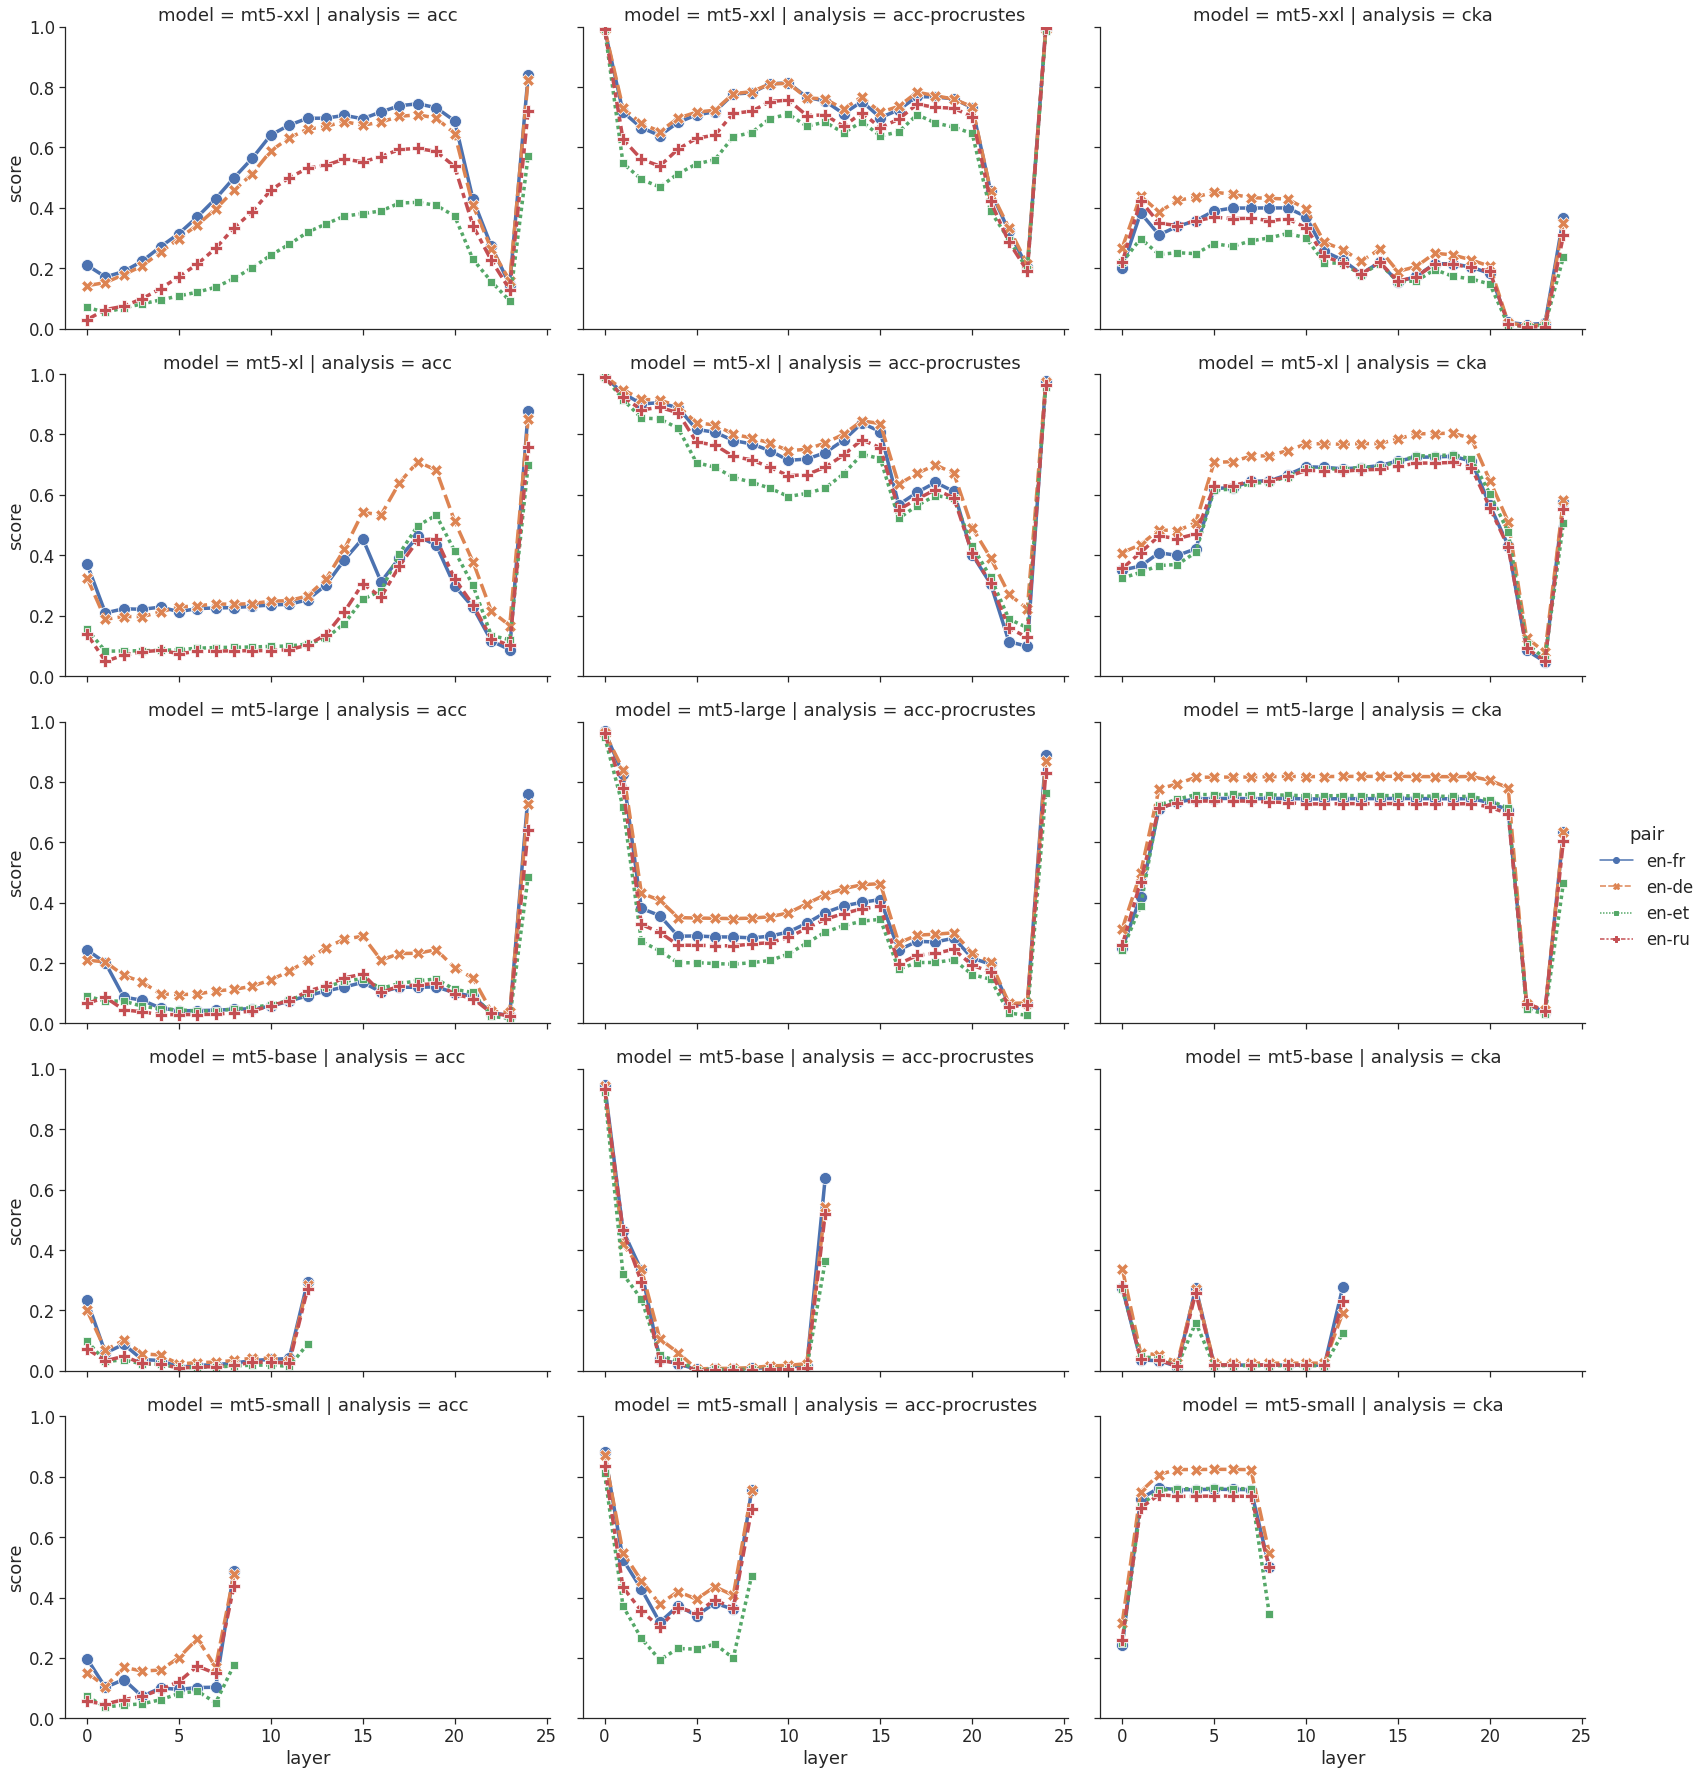

In [203]:
relplot_wrapepr(dfs["mT5"])

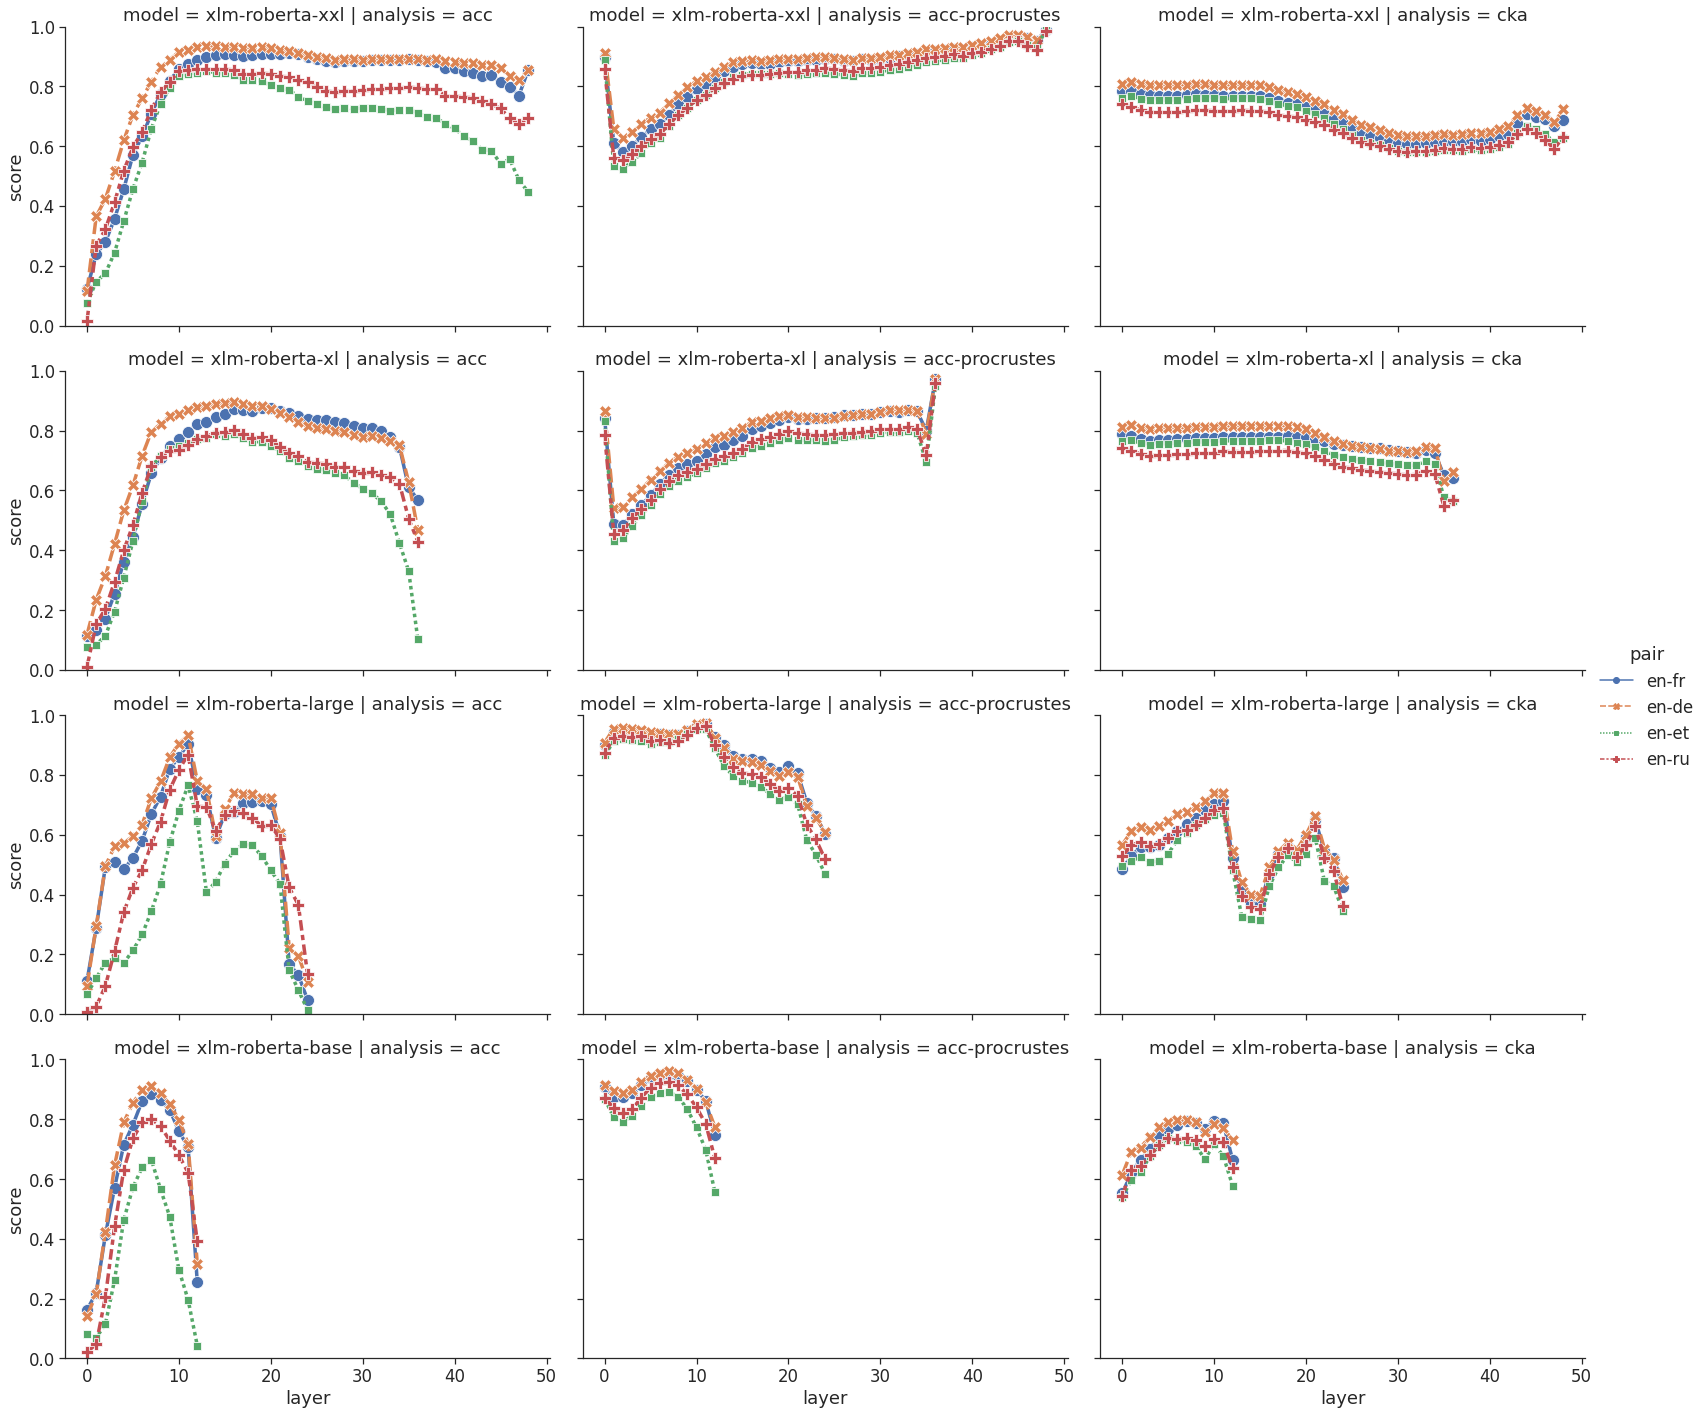

In [194]:
relplot_wrapepr(dfs["xlmr"])

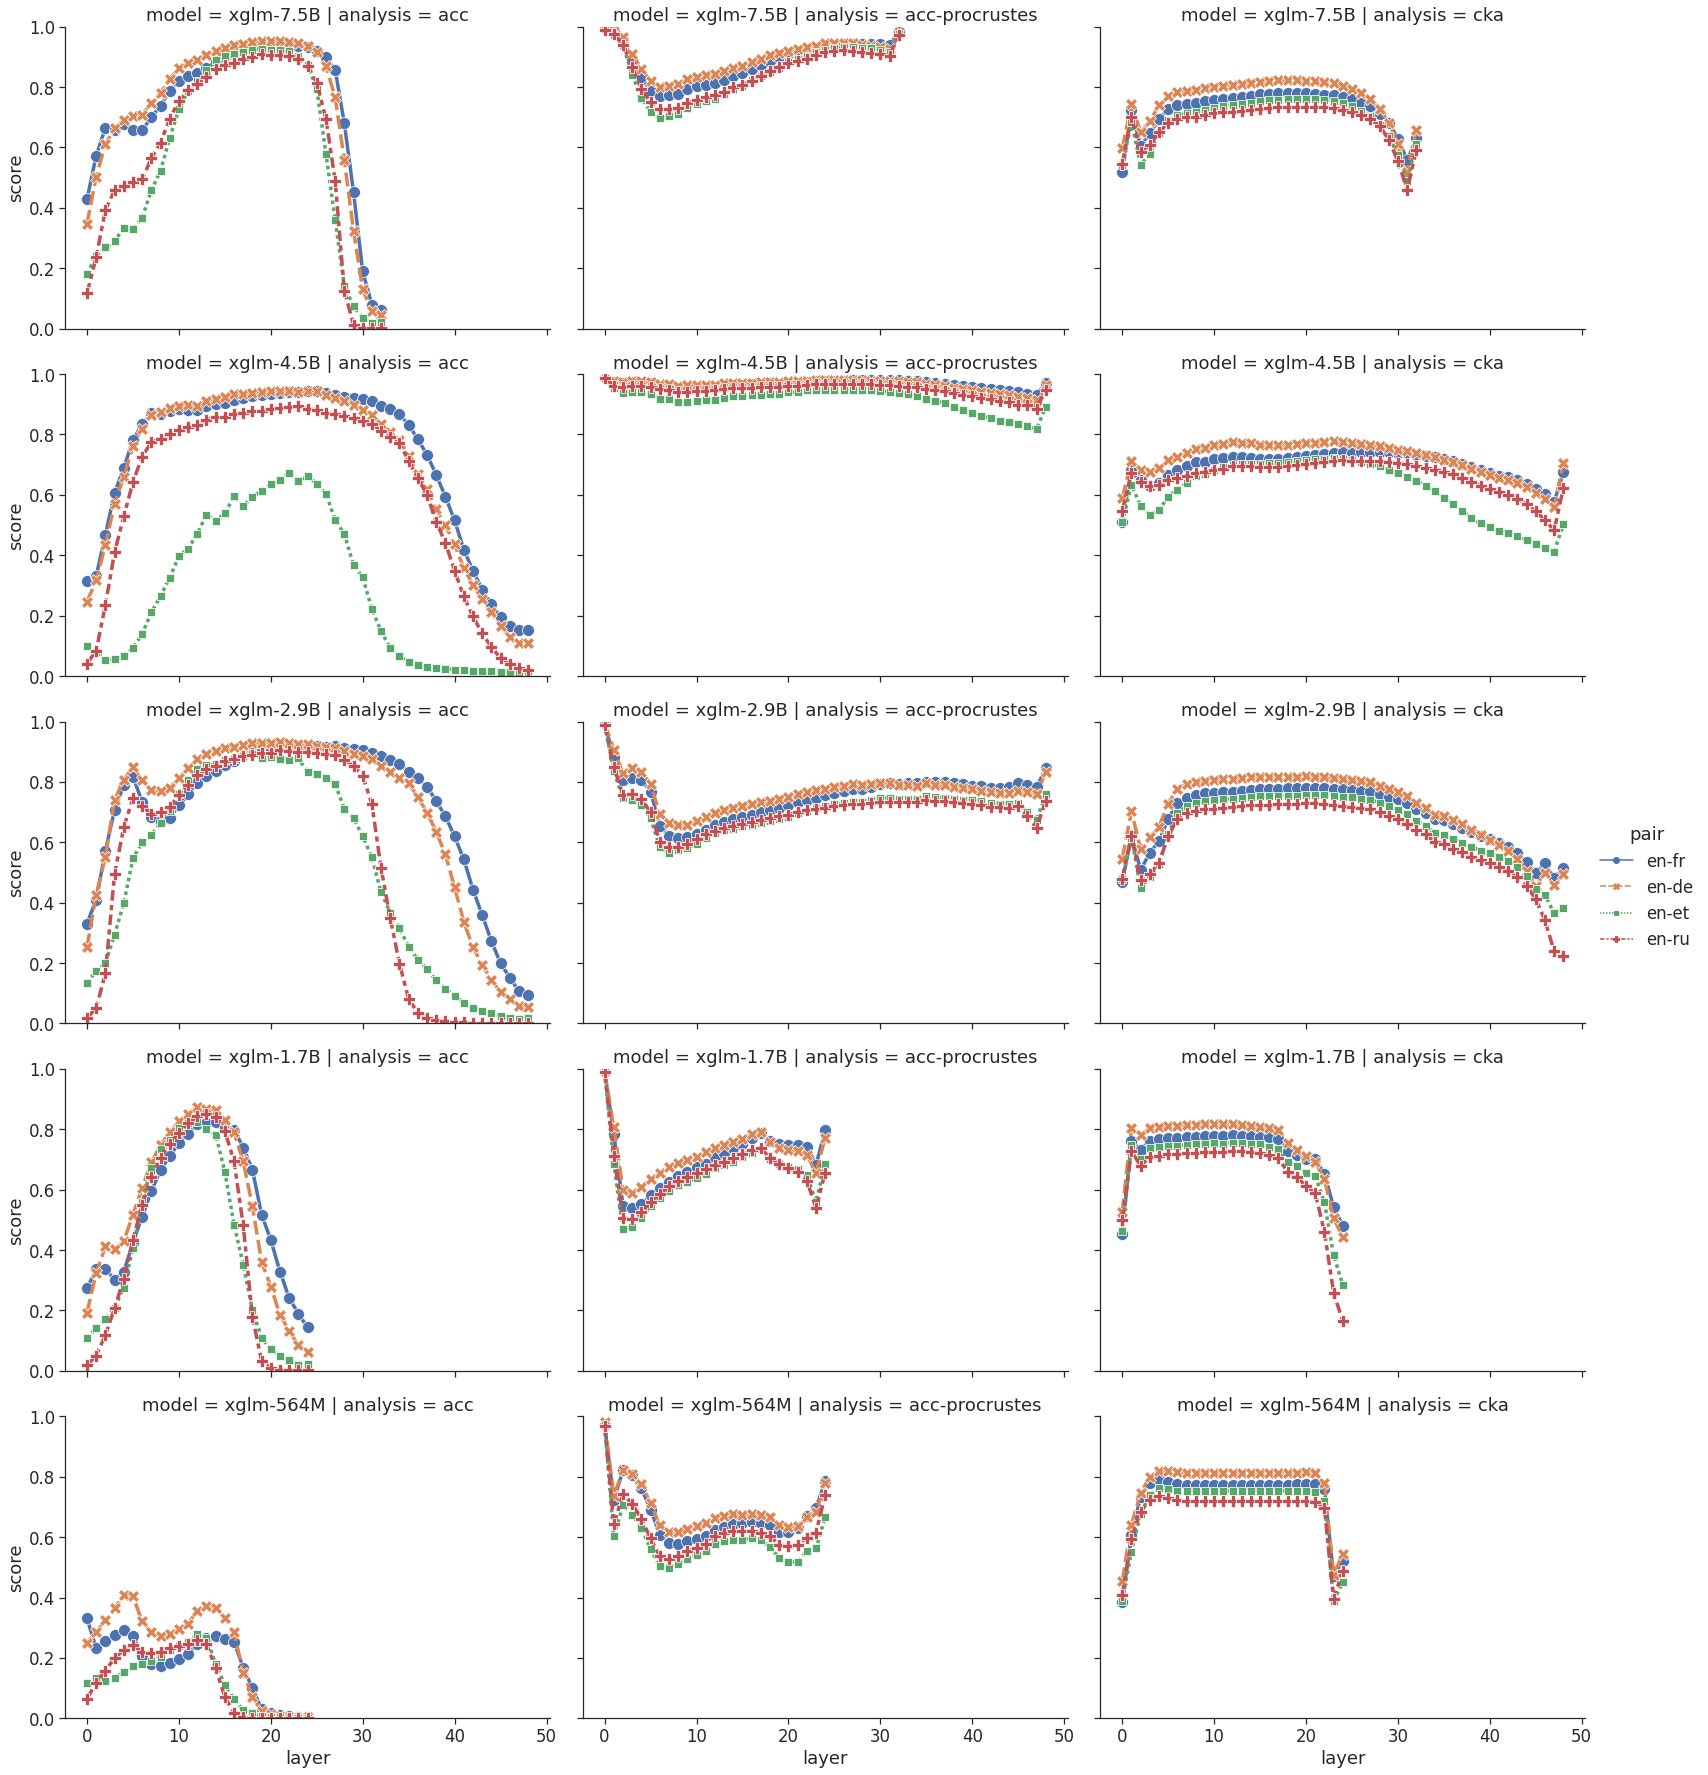

In [195]:
relplot_wrapepr(dfs["xglm"])

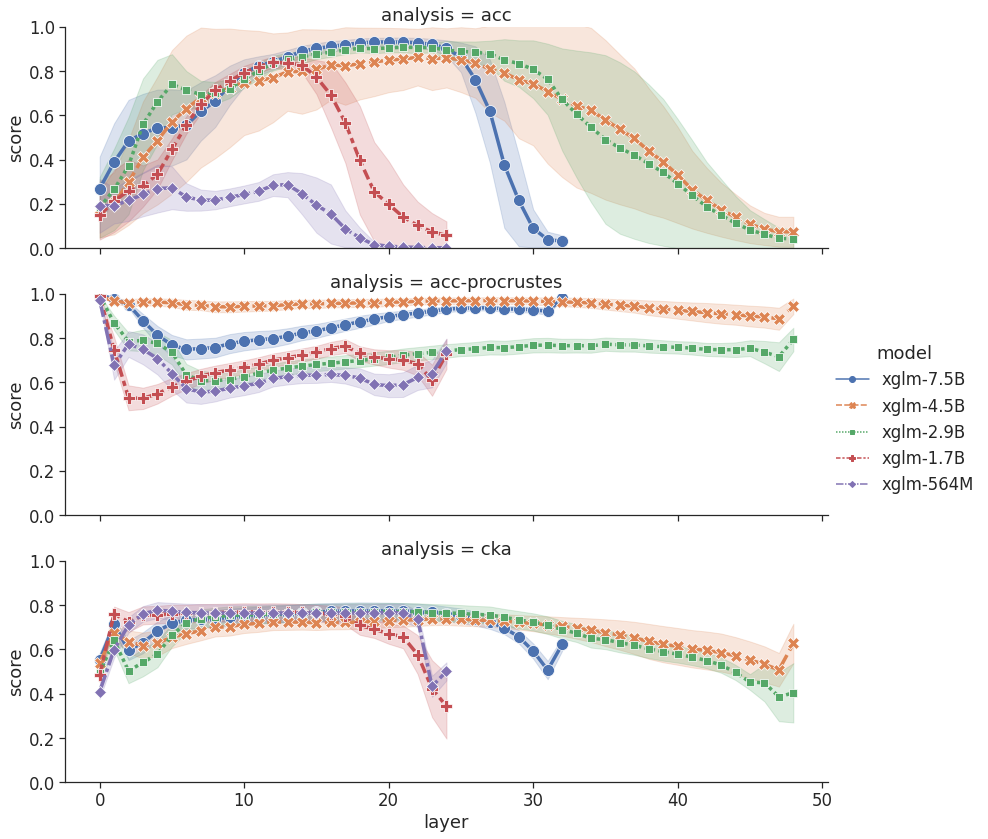

In [164]:
relplot_wrapepr(dfs["xglm"])

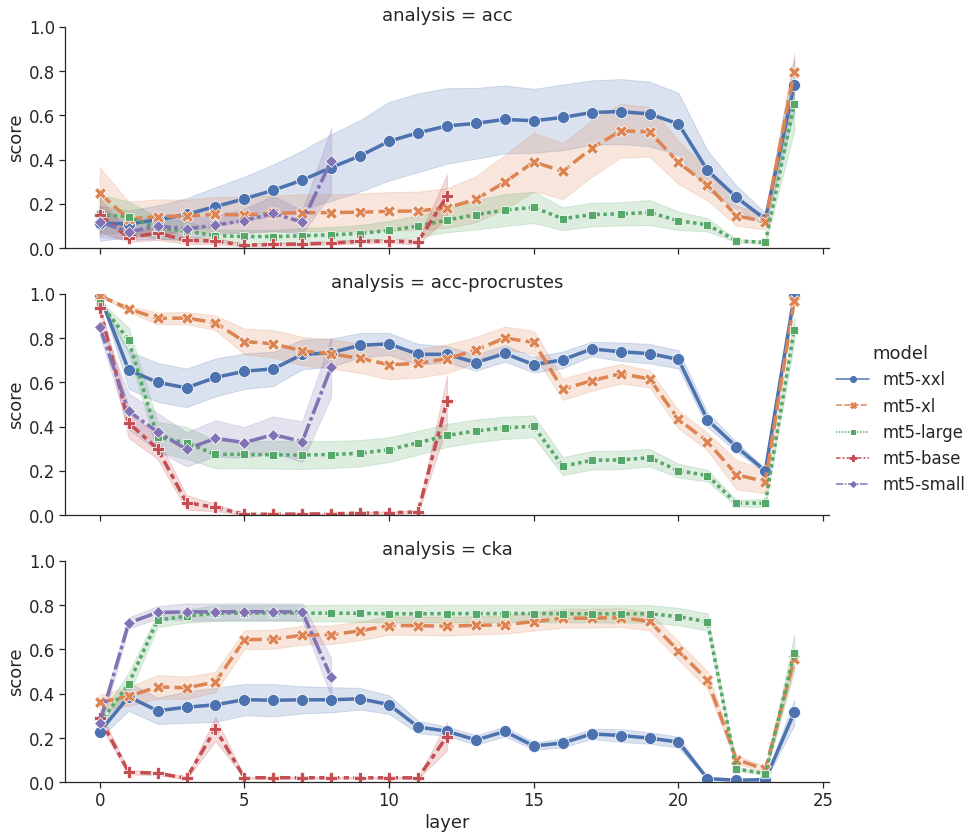

In [165]:
relplot_wrapepr(dfs["mT5"])

In [121]:
def plot(model_class, task):
        print(model_class, task)
        scores_dfs = pickle.load(open(f"../experiments/encoded_datasets/xnli/{model_class}-{task}-all_models.pkl", 'rb'))
        scores_dfs = {k: pd.DataFrame(dict(v)).melt(var_name="pair", value_name=task, ignore_index=False) for k, v in scores_dfs.items()}

        for k, v in scores_dfs.items():
            scores_dfs[k]['layer'] = v.index
            scores_dfs[k]['model'] = k.split('/')[-1]

        scores_dfs = pd.concat(scores_dfs, axis=0, ignore_index=True)

        sns.set(font_scale=1.5) 
        sns.set_style("ticks")

#         g = sns.relplot(data=scores_dfs, 
#                     x="layer", 
#                     y=task, 
#                     hue="model", 
#                     style="model", 
#                     markers=True, 
#                     col="pair", 
#                     kind="line", 
#                     ci="sd",
#                     linewidth=3.5,
#                     markersize=12,
#                     facet_kws={"legend_out": True})


#         plt.ylim(0,1)


#         g._legend.remove()
#         g.figure.legend(ncol=len(set(scores_dfs['model']))).set_bbox_to_anchor([0.67, 0.95])
        
#         g.fig.subplots_adjust(top=0.8)
#         g.fig.suptitle(f"{model_class} {task}".upper(), x=0.45, y=1.05)

#         plt.savefig(f"../assets/figures/{model_class}-{task}-four_langs.pdf", dpi=300,  bbox_inches='tight')

        fig, ax = plt.subplots(figsize=(11, 4))

        g = sns.lineplot(data=scores_dfs, 
                    x="layer", 
                    y=task, 
                    hue="model", 
                    style="model",
                    ci="sd",                     
                    markers=True, 
                    #kind="line", 
                    linewidth=3.5,
                    markersize=12,
                    ax=ax).set_title(f'{model_class} {task}'.upper(), y=1.02)


        plt.ylim(0,1)

        lgd = plt.legend(prop={'size': 12})

        g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')



    #     fig, ax = plt.subplots(figsize=(11, 4))

    #     g = sns.lineplot(data=scores_dfs, 
    #                 x="layer", 
    #                 y="accuracy", 
    #                 hue="model", 
    #                 style="model", 
    #                 markers=True, 
    #                 #kind="line", 
    #                 linewidth=3.5,
    #                 markersize=12,
    #                 ax=ax)


    #     plt.xticks(range(49))
    #     ax.tick_params(axis='x', rotation=45, labelsize=9)
    #     plt.ylim(0,1)
    #     lgd = plt.legend(prop={'size': 12})

    #     g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined-xticks.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')



    #     scores_dfs_rel = scores_dfs.copy()

    #     for hf_model_id in hf_model_ids:
    #         mid = hf_model_id.split('/')[-1]
    #         num_layers = scores_dfs_rel[scores_dfs_rel['model'] == mid]['layer'].max()
    #         scores_dfs_rel.loc[scores_dfs_rel.model == mid, 'layer'] = scores_dfs_rel.loc[scores_dfs_rel.model == mid, 'layer'] / num_layers
    #     scores_dfs_rel.rename(columns={"layer": "network depth"}, inplace=True)

    #     fig, ax = plt.subplots(figsize=(11, 4))

    #     g = sns.lineplot(data=scores_dfs_rel, 
    #                 x="network depth", 
    #                 y="accuracy", 
    #                 hue="model", 
    #                 style="model", 
    #                 markers=True, 
    #                 #kind="line", 
    #                 linewidth=3.5,
    #                 markersize=12,
    #                 ax=ax)


    #     plt.ylim(0,1)

    #     lgd = plt.legend(prop={'size': 12})

    #     g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined-rel.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')


In [122]:
# # ACCURACY
# model_class = "xlmr"
# task = "acc"
# plot(model_class, task)

xlmr cka
xlmr acc
xlmr acc-procrustes
xglm cka
xglm acc
xglm acc-procrustes
mT5 cka
mT5 acc
mT5 acc-procrustes


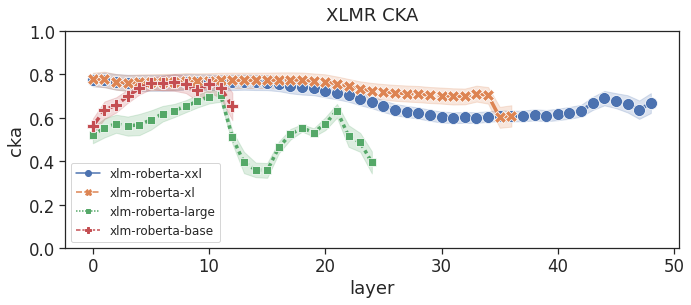

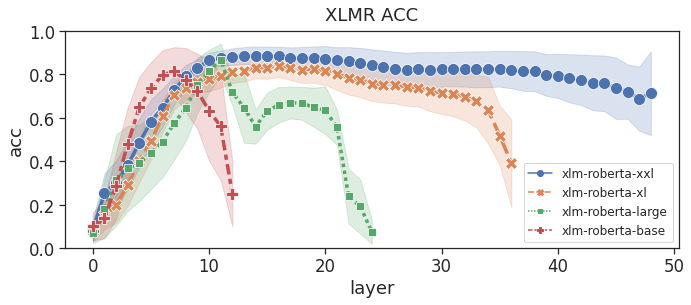

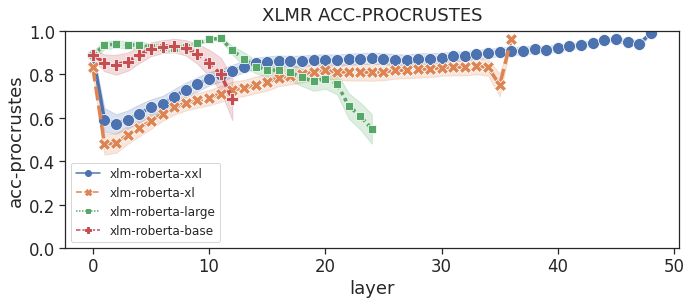

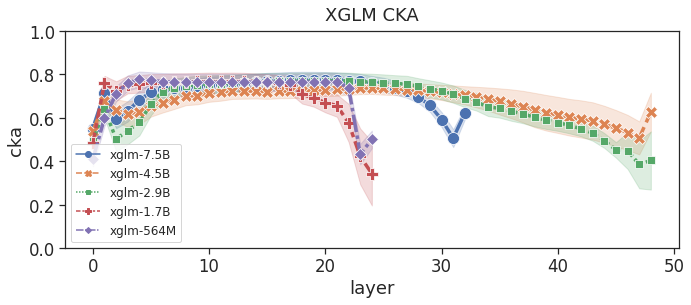

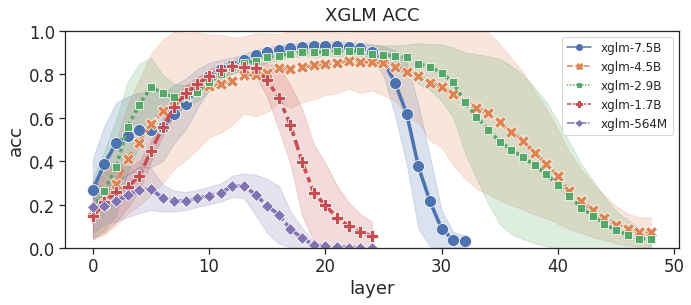

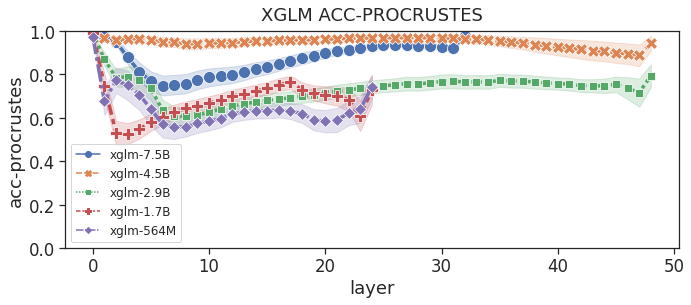

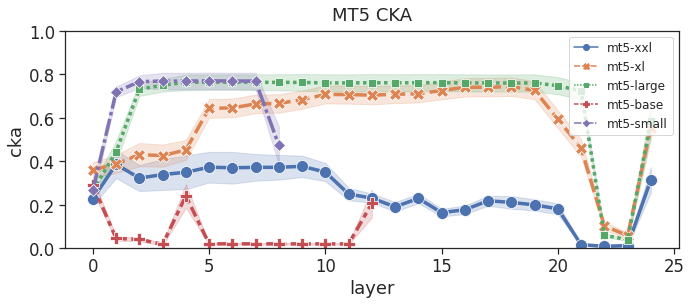

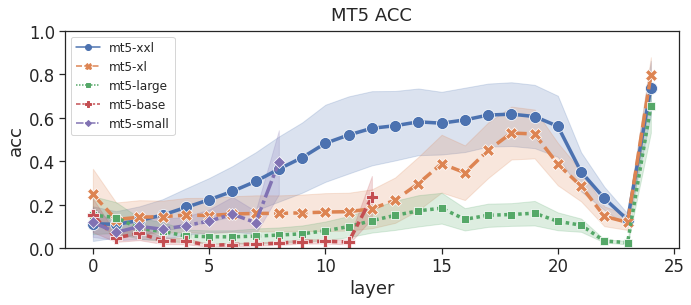

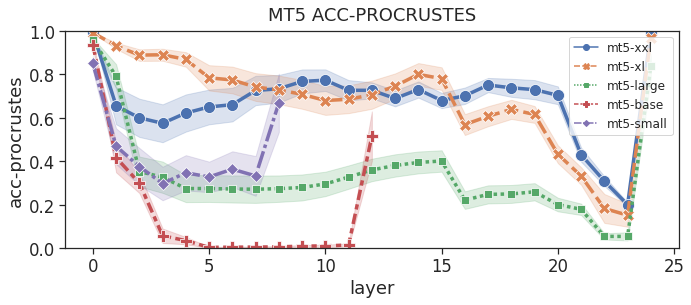

In [123]:
# ACCURACY
for model_class in ["xlmr", "xglm", "mT5"]:
    for task in ["cka", "acc", "acc-procrustes"]: # ["cka", "acc", "acc-cent", "acc-procrustes"]:
        plot(model_class, task)

xlmr
cka
acc
acc-cent
acc-procrustes


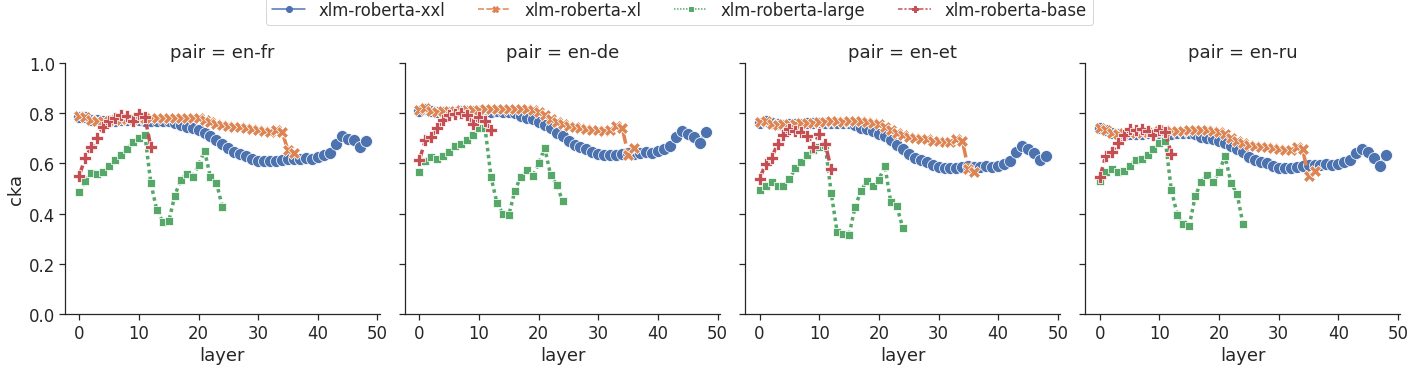

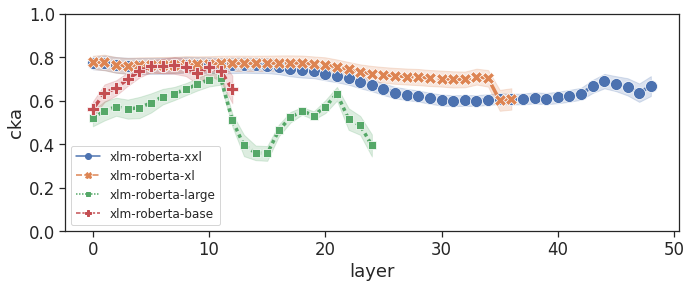

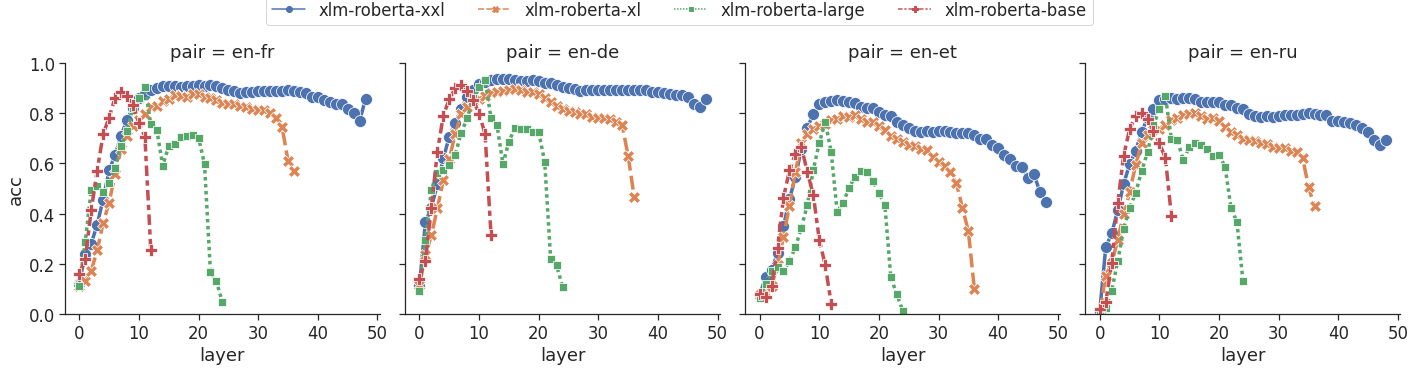

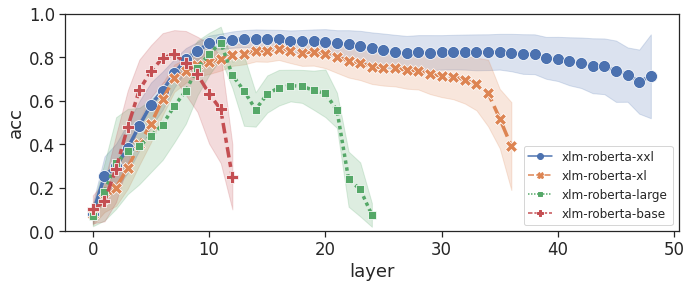

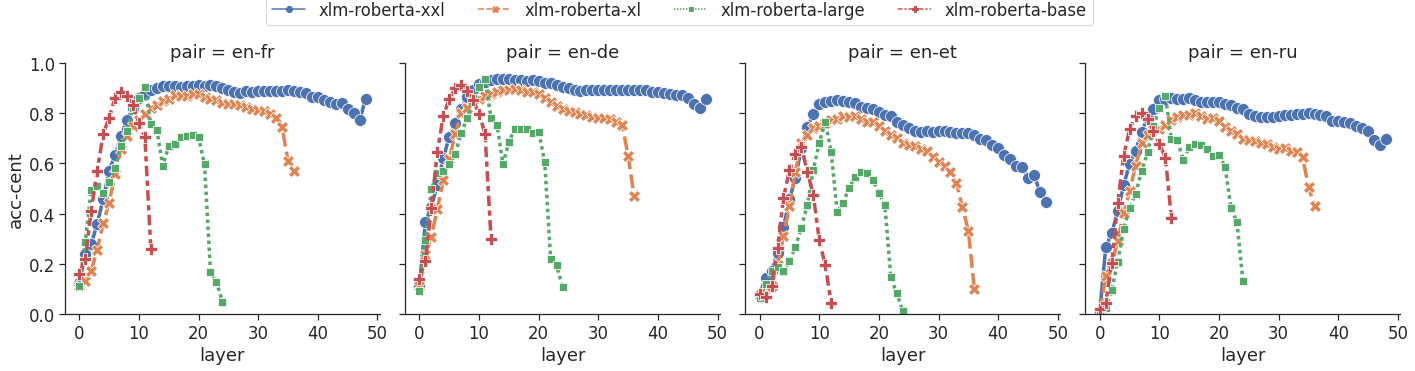

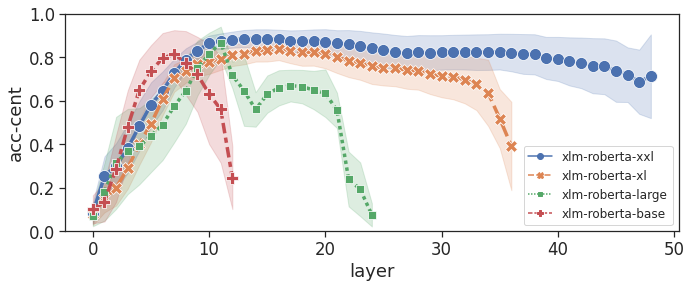

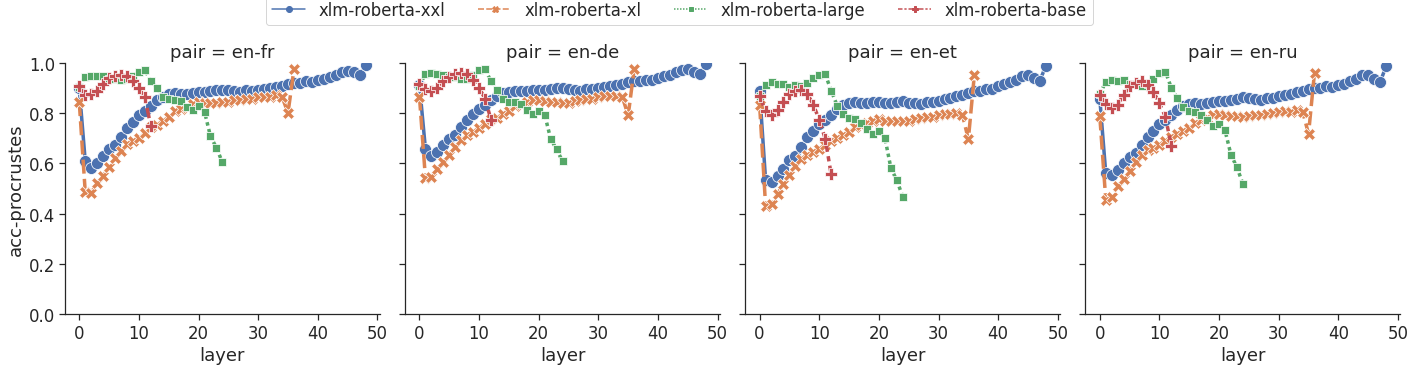

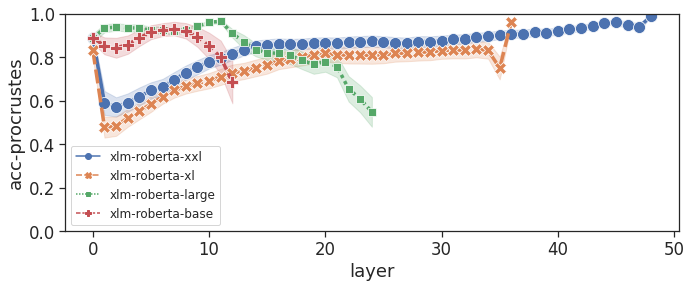

In [60]:
# ACCURACY
model_class = "xlmr"
print(model_class)
for task in ["cka", "acc", "acc-cent", "acc-procrustes"]:
    print(task)
    
    scores_dfs = pickle.load(open(f"../experiments/encoded_datasets/xnli/{model_class}-{task}-all_models.pkl", 'rb'))

    scores_dfs = {k: pd.DataFrame(dict(v)).melt(var_name="pair", value_name=task, ignore_index=False) for k, v in scores_dfs.items()}

    for k, v in scores_dfs.items():
        scores_dfs[k]['layer'] = v.index
        scores_dfs[k]['model'] = k.split('/')[-1]

    scores_dfs = pd.concat(scores_dfs, axis=0, ignore_index=True)


    sns.set(font_scale=1.5) 
    sns.set_style("ticks")

    scores_dfs.rename(columns = {'lang':'pair'}, inplace = True)

    # scores_dfs['pair'] = [f"en-{p}" for p in scores_dfs['pair']] 

    g = sns.relplot(data=scores_dfs, 
                x="layer", 
                y=task, 
                hue="model", 
                style="model", 
                markers=True, 
                col="pair", 
                kind="line", 
                ci="sd",
                linewidth=3.5,
                markersize=12,
                facet_kws={"legend_out": True})


    plt.ylim(0,1)


    g._legend.remove()
    g.figure.legend(ncol=len(set(scores_dfs['model']))).set_bbox_to_anchor([0.67, 1.07])


    plt.savefig(f"../assets/figures/{model_class}-{task}-four_langs.pdf", dpi=300,  bbox_inches='tight')

    fig, ax = plt.subplots(figsize=(11, 4))

    g = sns.lineplot(data=scores_dfs, 
                x="layer", 
                y=task, 
                hue="model", 
                style="model",
                ci="sd",                     
                markers=True, 
                #kind="line", 
                linewidth=3.5,
                markersize=12,
                ax=ax)


    plt.ylim(0,1)

    lgd = plt.legend(prop={'size': 12})

    g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

    
    
#     fig, ax = plt.subplots(figsize=(11, 4))

#     g = sns.lineplot(data=scores_dfs, 
#                 x="layer", 
#                 y="accuracy", 
#                 hue="model", 
#                 style="model", 
#                 markers=True, 
#                 #kind="line", 
#                 linewidth=3.5,
#                 markersize=12,
#                 ax=ax)


#     plt.xticks(range(49))
#     ax.tick_params(axis='x', rotation=45, labelsize=9)
#     plt.ylim(0,1)
#     lgd = plt.legend(prop={'size': 12})

#     g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined-xticks.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')



#     scores_dfs_rel = scores_dfs.copy()

#     for hf_model_id in hf_model_ids:
#         mid = hf_model_id.split('/')[-1]
#         num_layers = scores_dfs_rel[scores_dfs_rel['model'] == mid]['layer'].max()
#         scores_dfs_rel.loc[scores_dfs_rel.model == mid, 'layer'] = scores_dfs_rel.loc[scores_dfs_rel.model == mid, 'layer'] / num_layers
#     scores_dfs_rel.rename(columns={"layer": "network depth"}, inplace=True)

#     fig, ax = plt.subplots(figsize=(11, 4))

#     g = sns.lineplot(data=scores_dfs_rel, 
#                 x="network depth", 
#                 y="accuracy", 
#                 hue="model", 
#                 style="model", 
#                 markers=True, 
#                 #kind="line", 
#                 linewidth=3.5,
#                 markersize=12,
#                 ax=ax)


#     plt.ylim(0,1)

#     lgd = plt.legend(prop={'size': 12})

#     g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined-rel.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')


mT5
cka
acc
acc-cent
acc-procrustes


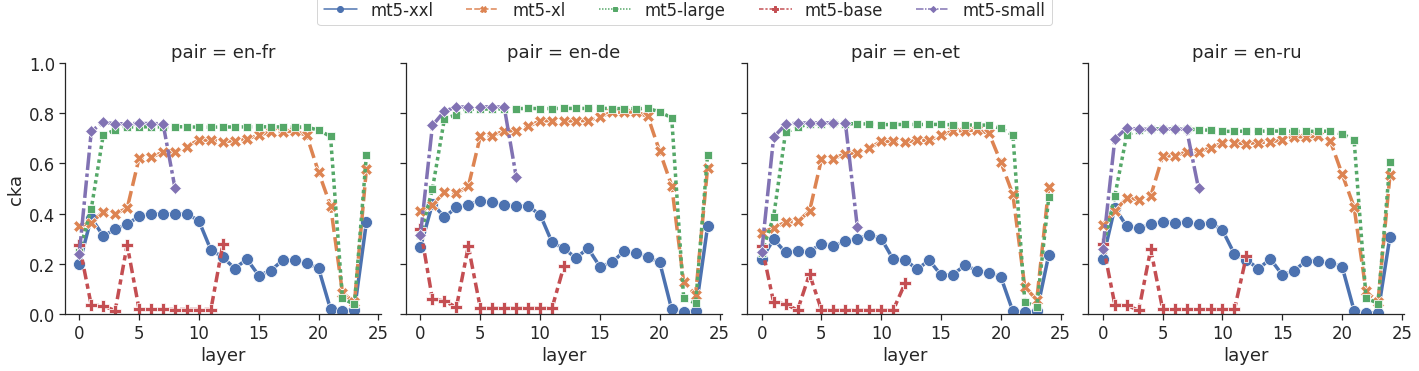

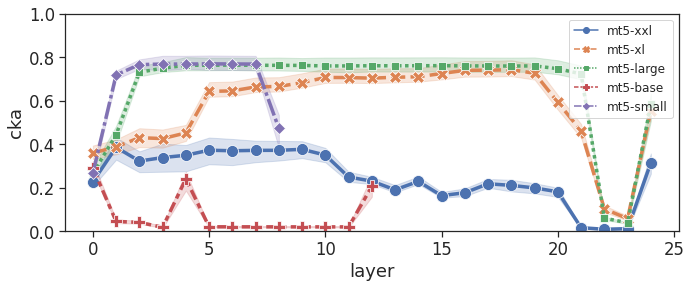

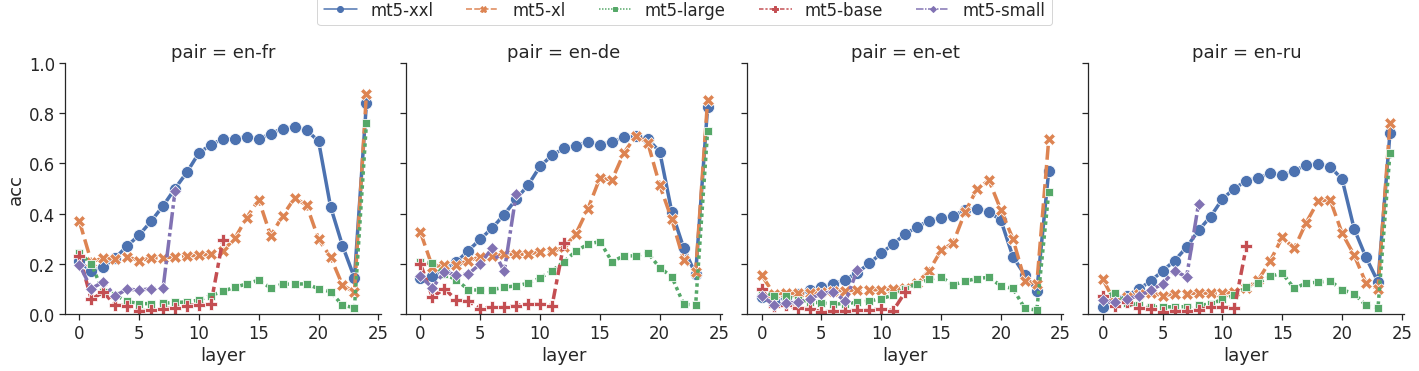

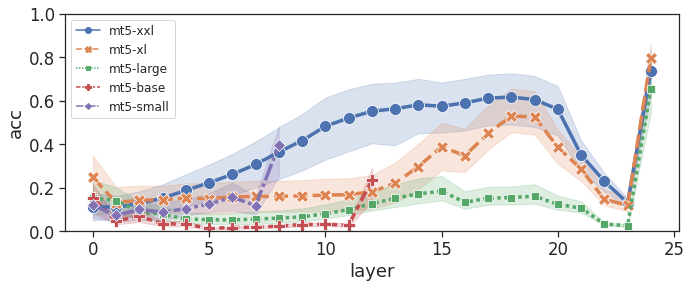

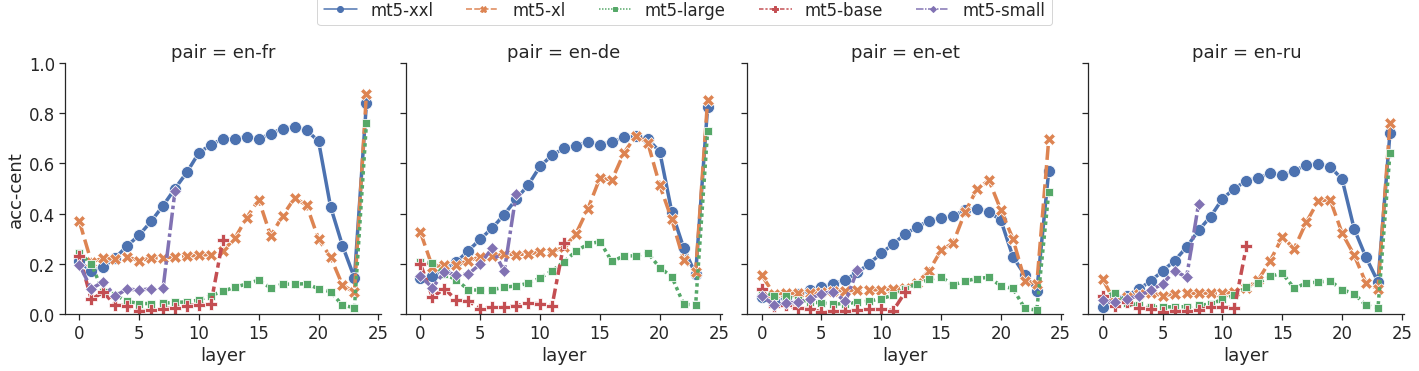

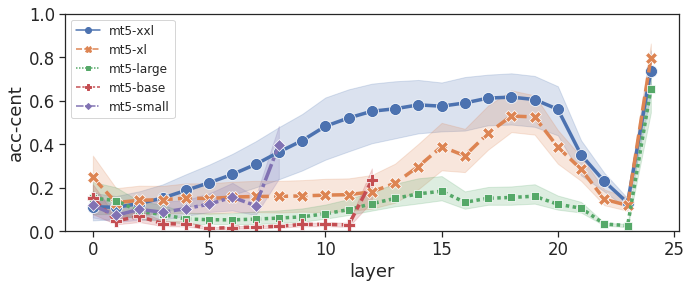

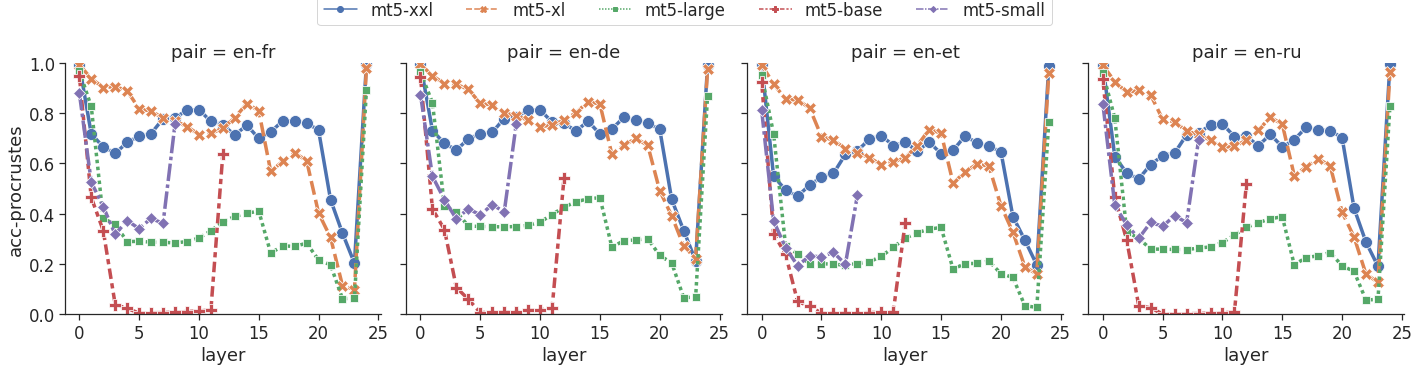

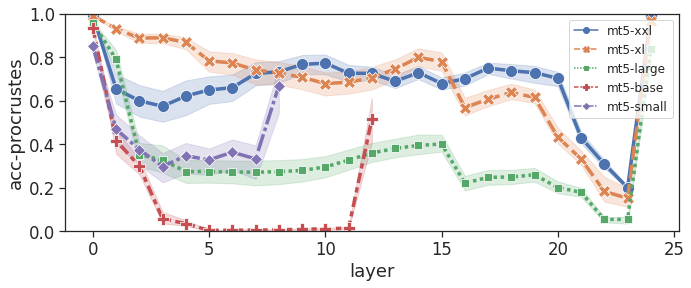

In [57]:
# ACCURACY
model_class = "mT5"
print(model_class)
for task in ["cka", "acc", "acc-cent", "acc-procrustes"]:
    print(task)
    
    scores_dfs = pickle.load(open(f"../experiments/encoded_datasets/xnli/{model_class}-{task}-all_models.pkl", 'rb'))

    scores_dfs = {k: pd.DataFrame(dict(v)).melt(var_name="pair", value_name=task, ignore_index=False) for k, v in scores_dfs.items()}

    for k, v in scores_dfs.items():
        scores_dfs[k]['layer'] = v.index
        scores_dfs[k]['model'] = k.split('/')[-1]

    scores_dfs = pd.concat(scores_dfs, axis=0, ignore_index=True)


    sns.set(font_scale=1.5) 
    sns.set_style("ticks")


    # scores_dfs['pair'] = [f"en-{p}" for p in scores_dfs['pair']] 

    g = sns.relplot(data=scores_dfs, 
                x="layer", 
                y=task, 
                hue="model", 
                style="model", 
                markers=True, 
                col="pair", 
                kind="line",
                ci="sd",                    
                linewidth=3.5,
                markersize=12,
                facet_kws={"legend_out": True})


    plt.ylim(0,1)


    g._legend.remove()
    g.figure.legend(ncol=len(set(scores_dfs['model']))).set_bbox_to_anchor([0.67, 1.07])


    plt.savefig(f"../assets/figures/{model_class}-{task}-four_langs.pdf", dpi=300,  bbox_inches='tight')

    fig, ax = plt.subplots(figsize=(11, 4))

    g = sns.lineplot(data=scores_dfs, 
                x="layer", 
                y=task, 
                hue="model", 
                style="model",
                ci="sd",
                markers=True, 
                #kind="line", 
                linewidth=3.5,
                markersize=12,
                ax=ax)


    plt.ylim(0,1)

    lgd = plt.legend(prop={'size': 12})

    g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

    
    
#     fig, ax = plt.subplots(figsize=(11, 4))

#     g = sns.lineplot(data=scores_dfs, 
#                 x="layer", 
#                 y="accuracy", 
#                 hue="model", 
#                 style="model", 
#                 markers=True, 
#                 #kind="line", 
#                 linewidth=3.5,
#                 markersize=12,
#                 ax=ax)


#     plt.xticks(range(49))
#     ax.tick_params(axis='x', rotation=45, labelsize=9)
#     plt.ylim(0,1)
#     lgd = plt.legend(prop={'size': 12})

#     g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined-xticks.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')



#     scores_dfs_rel = scores_dfs.copy()

#     for hf_model_id in hf_model_ids:
#         mid = hf_model_id.split('/')[-1]
#         num_layers = scores_dfs_rel[scores_dfs_rel['model'] == mid]['layer'].max()
#         scores_dfs_rel.loc[scores_dfs_rel.model == mid, 'layer'] = scores_dfs_rel.loc[scores_dfs_rel.model == mid, 'layer'] / num_layers
#     scores_dfs_rel.rename(columns={"layer": "network depth"}, inplace=True)

#     fig, ax = plt.subplots(figsize=(11, 4))

#     g = sns.lineplot(data=scores_dfs_rel, 
#                 x="network depth", 
#                 y="accuracy", 
#                 hue="model", 
#                 style="model", 
#                 markers=True, 
#                 #kind="line", 
#                 linewidth=3.5,
#                 markersize=12,
#                 ax=ax)


#     plt.ylim(0,1)

#     lgd = plt.legend(prop={'size': 12})

#     g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined-rel.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')


xglm
cka
acc
acc-cent
acc-procrustes


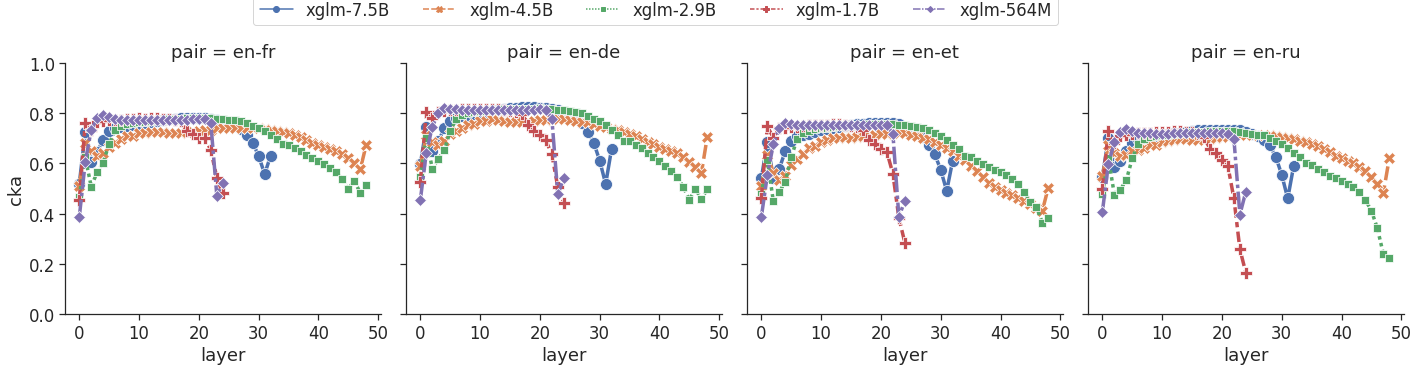

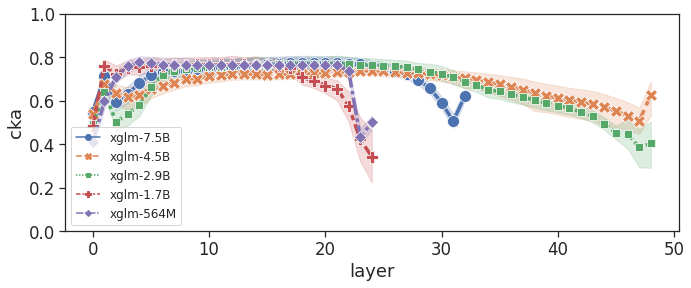

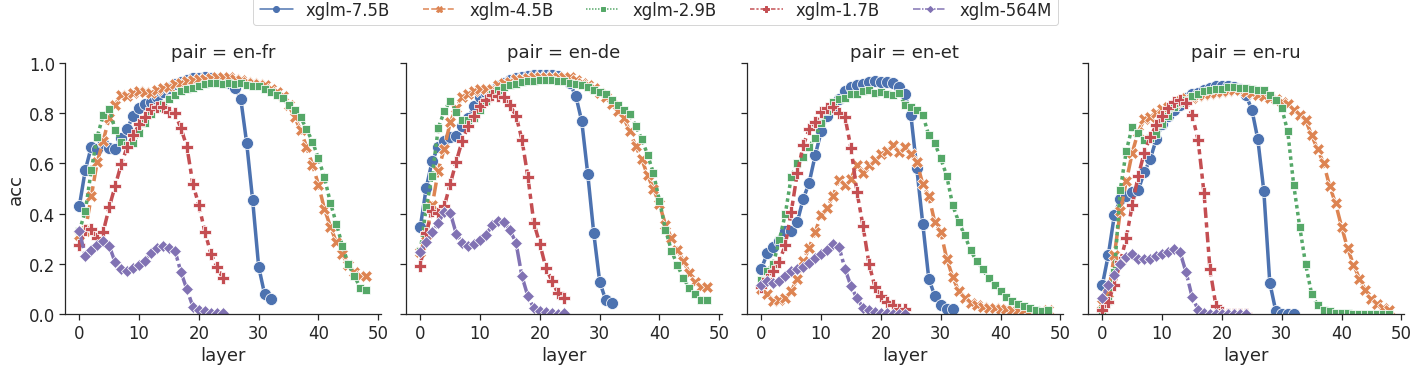

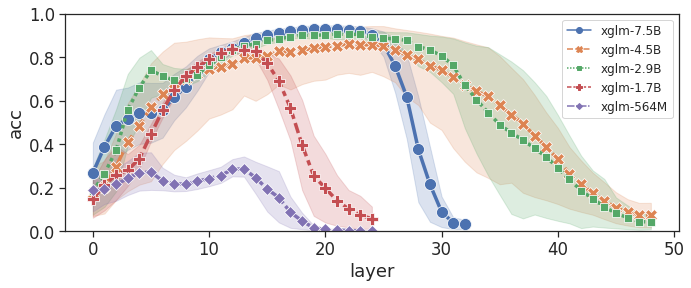

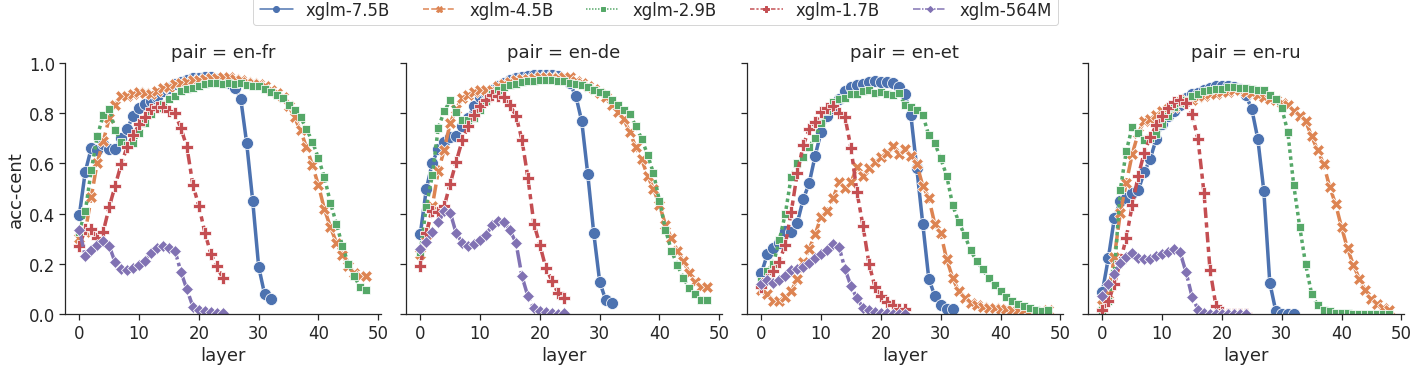

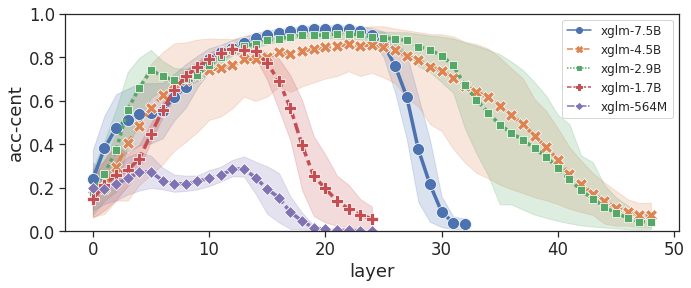

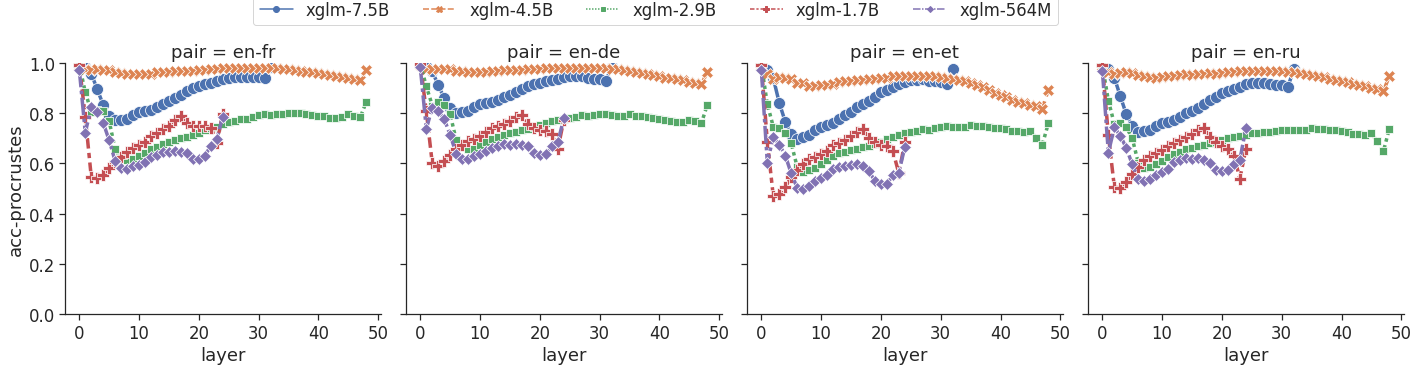

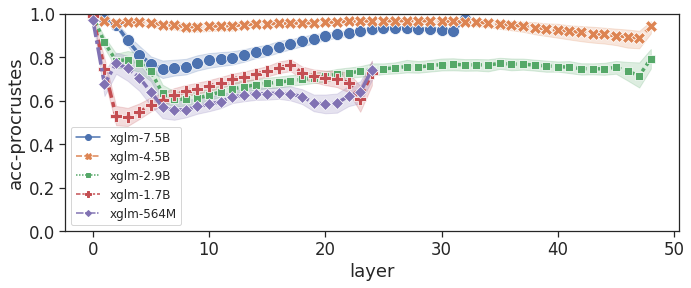

In [58]:
# ACCURACY
model_class = "xglm"
print(model_class)
for task in ["cka", "acc", "acc-cent", "acc-procrustes"]:
    print(task)
    
    scores_dfs = pickle.load(open(f"../experiments/encoded_datasets/xnli/{model_class}-{task}-all_models.pkl", 'rb'))

    scores_dfs = {k: pd.DataFrame(dict(v)).melt(var_name="pair", value_name=task, ignore_index=False) for k, v in scores_dfs.items()}

    for k, v in scores_dfs.items():
        scores_dfs[k]['layer'] = v.index
        scores_dfs[k]['model'] = k.split('/')[-1]

    scores_dfs = pd.concat(scores_dfs, axis=0, ignore_index=True)


    sns.set(font_scale=1.5) 
    sns.set_style("ticks")


    g = sns.relplot(data=scores_dfs, 
                x="layer", 
                y=task, 
                hue="model", 
                style="model", 
                markers=True, 
                col="pair", 
                kind="line",
                ci="sd",
                linewidth=3.5,
                markersize=12,
                facet_kws={"legend_out": True})


    plt.ylim(0,1)


    g._legend.remove()
    g.figure.legend(ncol=len(set(scores_dfs['model']))).set_bbox_to_anchor([0.67, 1.07])


    plt.savefig(f"../assets/figures/{model_class}-{task}-four_langs.pdf", dpi=300,  bbox_inches='tight')

    fig, ax = plt.subplots(figsize=(11, 4))

    g = sns.lineplot(data=scores_dfs, 
                x="layer", 
                y=task, 
                hue="model", 
                style="model",
                ci="sd",
                markers=True, 
                #kind="line", 
                linewidth=3.5,
                markersize=12,
                ax=ax)


    plt.ylim(0,1)

    lgd = plt.legend(prop={'size': 12})

    g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')

    
    
#     fig, ax = plt.subplots(figsize=(11, 4))

#     g = sns.lineplot(data=scores_dfs, 
#                 x="layer", 
#                 y="accuracy", 
#                 hue="model", 
#                 style="model", 
#                 markers=True, 
#                 #kind="line", 
#                 linewidth=3.5,
#                 markersize=12,
#                 ax=ax)


#     plt.xticks(range(49))
#     ax.tick_params(axis='x', rotation=45, labelsize=9)
#     plt.ylim(0,1)
#     lgd = plt.legend(prop={'size': 12})

#     g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined-xticks.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')



#     scores_dfs_rel = scores_dfs.copy()

#     for hf_model_id in hf_model_ids:
#         mid = hf_model_id.split('/')[-1]
#         num_layers = scores_dfs_rel[scores_dfs_rel['model'] == mid]['layer'].max()
#         scores_dfs_rel.loc[scores_dfs_rel.model == mid, 'layer'] = scores_dfs_rel.loc[scores_dfs_rel.model == mid, 'layer'] / num_layers
#     scores_dfs_rel.rename(columns={"layer": "network depth"}, inplace=True)

#     fig, ax = plt.subplots(figsize=(11, 4))

#     g = sns.lineplot(data=scores_dfs_rel, 
#                 x="network depth", 
#                 y="accuracy", 
#                 hue="model", 
#                 style="model", 
#                 markers=True, 
#                 #kind="line", 
#                 linewidth=3.5,
#                 markersize=12,
#                 ax=ax)


#     plt.ylim(0,1)

#     lgd = plt.legend(prop={'size': 12})

#     g.figure.savefig(f"../assets/figures/{model_class}-{task}-langs_joined-rel.pdf", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
